# Attrition Navigator: Predictive Modeling for Strategic Employee Retention

## Project Description:

### Objective:
To analyze employee attrition data to identify key factors influencing employee turnover and develop predictive models that can help organizations proactively manage and reduce attrition rates.

### Scope:
This project will involve data collection, exploratory data analysis (EDA), feature engineering, and the development of predictive models. The goal is to provide actionable insights and recommendations for HR departments to improve employee retention strategies.

Dataset Description:

The dataset used for this analysis focuses on employee attrition and includes various attributes that influence employee retention. The dataset comprises the following explanatory variables and a binary response variable:

   * **EmployeeID:** ----- Unique identifier for each employee.

   * **Age:** ------------ Age of the employee.

   * **Attrition:** -------Indicator of whether the employee has left the company (Yes = 1, No = 0).

   * **BusinessTravel:**---Frequency of business travel (Travel_Rarely, Travel_Frequently, Non-Travel).

   * **Department:**-------Department where the employee works (Sales, Research & Development, Human Resources).

   * **DistanceFromHome:**--Distance from employee’s home to the workplace (in kilometers).

   * **Education:**---------Level of education (1 = Below College, 2 = College, 3 = Bachelor’s, 4 = Master’s).

   * **EducationField:**----Field of education (Life Sciences, Medical, Marketing, Other).

   * **EmployeeCount:**-----Number of employees in the same department.

   * **Gender:**------------Gender of the employee (Male, Female).

   * **JobLevel:**----------Job level of the employee (1 = Entry Level, 2 = Junior, 3 = Middle, 4 = Senior, 5 = Executive).

   * **JobRole:**-----------Role of the employee (e.g., Healthcare Representative, Research Scientist, Sales Executive).

   * **MaritalStatus:**-----Marital status of the employee (Married, Single, Divorced).

   * **MonthlyIncome:**-----Monthly income of the employee.

   * **NumCompaniesWorked:**----Number of companies the employee has worked for.

   * **Over18:**------------Indicates if the employee is over 18 years old (Yes = Y).

   * **PercentSalaryHike:**----Percentage increase in salary from the previous year.

   * **StandardHours:**-----Number of standard working hours per week.

   * **StockOptionLevel:**--Level of stock options (0 = No Stock Options, 1 = Low, 2 = Medium, 3 = High).

   * **TotalWorkingYears:**---Total number of years the employee has worked.

   * **TrainingTimesLastYear:**-----Number of training sessions attended in the past year.

   * **YearsAtCompany:**------Number of years the employee has been at the current company.

   * **YearsSinceLastPromotion:**-------Number of years since the employee’s last promotion.

   * **YearsWithCurrManager:**------Number of years the employee has worked with the current manager.

   * **EnvironmentSatisfaction:**----Satisfaction level with the working environment(1 =Low, 2 =Medium, 3 =High, 4 =Very High).

   * **JobSatisfaction:**------Satisfaction level with the job role (1 = Low, 2 = Medium, 3 = High, 4 = Very High).

   * **WorkLifeBalance:**------Work-life balance satisfaction (1 = Poor, 2 = Fair, 3 = Good, 4 = Excellent).

   * **JobInvolvement:**-------Level of job involvement (1 = Low, 2 = Medium, 3 = High).

   * **PerformanceRating:**----Performance rating of the employee (1 = Low, 2 = Good, 3 = Excellent, 4 = Outstanding).

This dataset is crucial for analyzing factors contributing to employee attrition and developing predictive models to understand employee retention dynamics better. It provides insights into how various aspects of employee profiles and job conditions affect the likelihood of attrition.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data
import pandas as pd
employ = pd.read_excel(r"C:\Users\Remya\Desktop\UNIFIED MENTOR\EMPLOYEE ATTRITION\Attrition data.xlsx")
employ

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,0,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,0,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [3]:
# Shape
employ.shape

(4410, 29)

In [4]:
#Size
employ.size

127890

In [5]:
# Deleting unwanted columns
employ.drop(['Education','EmployeeCount','Over18','StandardHours'],axis = 1, inplace = True)

In [6]:
employ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   int64  
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [7]:
# Renaming Columns
employ.rename(columns={"EmployeeID":'Employee_ID',"DistanceFromHome":'Distance_From_Home',"BusinessTravel":'Business_Travel',
"EducationField":'Education_Field',"JobLevel":'Job_Level',"JobRole":'Job_Role', "MonthlyIncome":'Monthly_Income',
"NumCompaniesWorked":'Num_Companies_Worked',"PercentSalaryHike":'Percent_Salary_Hike',"StockOptionLevel":'Stock_Option_Level',
"TotalWorkingYears":'Total_Working_Years',"TrainingTimesLastYear":'Training_Times_LastYear',"YearsAtCompany":'Years_At_Company',
"YearsSinceLastPromotion":'Years_Since_Last_Promotion',"YearsWithCurrManager":'Years_With_Current_Manager', 
"EnvironmentSatisfaction":'Environment_Satisfaction',"JobSatisfaction": 'Job_Satisfaction',"WorkLifeBalance":'Work_Life_Balance',
"JobInvolvement":'Job_Involvement',"PerformanceRating":'Performance_Rating',"MaritalStatus":'Marital_Status'},inplace = True)

In [8]:
# Checking column name
employ.columns

Index(['Employee_ID', 'Age', 'Attrition', 'Business_Travel', 'Department',
       'Distance_From_Home', 'Education_Field', 'Gender', 'Job_Level',
       'Job_Role', 'Marital_Status', 'Monthly_Income', 'Num_Companies_Worked',
       'Percent_Salary_Hike', 'Stock_Option_Level', 'Total_Working_Years',
       'Training_Times_LastYear', 'Years_At_Company',
       'Years_Since_Last_Promotion', 'Years_With_Current_Manager',
       'Environment_Satisfaction', 'Job_Satisfaction', 'Work_Life_Balance',
       'Job_Involvement', 'Performance_Rating'],
      dtype='object')

## 2. Data cleaning

In [9]:
#Checking missing values
employ.isna().sum()

Employee_ID                    0
Age                            0
Attrition                      0
Business_Travel                0
Department                     0
Distance_From_Home             0
Education_Field                0
Gender                         0
Job_Level                      0
Job_Role                       0
Marital_Status                 0
Monthly_Income                 0
Num_Companies_Worked          19
Percent_Salary_Hike            0
Stock_Option_Level             0
Total_Working_Years            9
Training_Times_LastYear        0
Years_At_Company               0
Years_Since_Last_Promotion     0
Years_With_Current_Manager     0
Environment_Satisfaction      25
Job_Satisfaction              20
Work_Life_Balance             38
Job_Involvement                0
Performance_Rating             0
dtype: int64

In [10]:
#Replacing blank cells with values
from sklearn.impute import SimpleImputer
import numpy as np
mean_imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
employ['Num_Companies_Worked'] = pd.DataFrame(mean_imputer.fit_transform(employ[['Num_Companies_Worked']]))
employ['Environment_Satisfaction'] = pd.DataFrame(mean_imputer.fit_transform(employ[['Environment_Satisfaction']]))
employ['Job_Satisfaction'] = pd.DataFrame(mean_imputer.fit_transform(employ[['Job_Satisfaction']]))
employ['Work_Life_Balance'] = pd.DataFrame(mean_imputer.fit_transform(employ[['Work_Life_Balance']]))
employ['Total_Working_Years'] = pd.DataFrame(mean_imputer.fit_transform(employ[['Total_Working_Years']]))
employ.isna().sum()

Employee_ID                   0
Age                           0
Attrition                     0
Business_Travel               0
Department                    0
Distance_From_Home            0
Education_Field               0
Gender                        0
Job_Level                     0
Job_Role                      0
Marital_Status                0
Monthly_Income                0
Num_Companies_Worked          0
Percent_Salary_Hike           0
Stock_Option_Level            0
Total_Working_Years           0
Training_Times_LastYear       0
Years_At_Company              0
Years_Since_Last_Promotion    0
Years_With_Current_Manager    0
Environment_Satisfaction      0
Job_Satisfaction              0
Work_Life_Balance             0
Job_Involvement               0
Performance_Rating            0
dtype: int64

In [11]:
#Rearranging columns
employ = employ[['Employee_ID','Business_Travel','Department','Education_Field','Gender','Job_Role','Marital_Status','Age','Distance_From_Home',
                 'Job_Level','Monthly_Income','Num_Companies_Worked','Percent_Salary_Hike','Stock_Option_Level','Total_Working_Years',
                 'Training_Times_LastYear','Years_At_Company','Years_Since_Last_Promotion','Years_With_Current_Manager',
                 'Environment_Satisfaction','Job_Satisfaction','Work_Life_Balance','Job_Involvement','Performance_Rating','Attrition']]


In [12]:
# Data with new column names
employ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_ID                 4410 non-null   int64  
 1   Business_Travel             4410 non-null   object 
 2   Department                  4410 non-null   object 
 3   Education_Field             4410 non-null   object 
 4   Gender                      4410 non-null   object 
 5   Job_Role                    4410 non-null   object 
 6   Marital_Status              4410 non-null   object 
 7   Age                         4410 non-null   int64  
 8   Distance_From_Home          4410 non-null   int64  
 9   Job_Level                   4410 non-null   int64  
 10  Monthly_Income              4410 non-null   int64  
 11  Num_Companies_Worked        4410 non-null   float64
 12  Percent_Salary_Hike         4410 non-null   int64  
 13  Stock_Option_Level          4410 

In [13]:
# Checking duplicates
Duplicate = employ.duplicated()
sum(Duplicate)

0

In [14]:
#Checking statatics
employ.describe()

,Employee_ID,Age,Distance_From_Home,Job_Level,Monthly_Income,Num_Companies_Worked,Percent_Salary_Hike,Stock_Option_Level,Total_Working_Years,Training_Times_LastYear,Years_At_Company,Years_Since_Last_Promotion,Years_With_Current_Manager,Environment_Satisfaction,Job_Satisfaction,Work_Life_Balance,Job_Involvement,Performance_Rating,Attrition
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741,0.161224
std,1273.201673,9.133301,8.105026,1.106689,47068.888559,2.493497,3.659108,0.851883,7.774275,1.288978,6.125135,3.221699,3.567327,1.089654,1.098753,0.703195,0.711400,0.360742,0.367780
min,1.000000,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1103.250000,30.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
50%,2205.500000,36.000000,7.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
75%,3307.750000,43.000000,14.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,0.000000
max,4410.000000,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [15]:
# Findig skewness
employ.iloc[:,7:25].skew()

Age                           0.413005
Distance_From_Home            0.957466
Job_Level                     1.024703
Monthly_Income                1.368884
Num_Companies_Worked          1.028984
Percent_Salary_Hike           0.820569
Stock_Option_Level            0.968321
Total_Working_Years           1.117972
Training_Times_LastYear       0.552748
Years_At_Company              1.763328
Years_Since_Last_Promotion    1.982939
Years_With_Current_Manager    0.832884
Environment_Satisfaction     -0.324214
Job_Satisfaction             -0.329369
Work_Life_Balance            -0.559455
Job_Involvement              -0.498080
Performance_Rating            1.920574
Attrition                     1.843111
dtype: float64

In [16]:
# Findig kurtosis
employ.iloc[:,7:25].kurtosis()

Age                          -0.405951
Distance_From_Home           -0.227045
Job_Level                     0.395525
Monthly_Income                1.000232
Num_Companies_Worked          0.020303
Percent_Salary_Hike          -0.302638
Stock_Option_Level            0.361086
Total_Working_Years           0.920937
Training_Times_LastYear       0.491149
Years_At_Company              3.923864
Years_Since_Last_Promotion    3.601761
Years_With_Current_Manager    0.167949
Environment_Satisfaction     -1.191104
Job_Satisfaction             -1.211313
Work_Life_Balance             0.453545
Job_Involvement               0.267663
Performance_Rating            1.689372
Attrition                     1.397690
dtype: float64

In [17]:
# Findig variance
employ.iloc[:,7:25].var()

Age                           8.341719e+01
Distance_From_Home            6.569144e+01
Job_Level                     1.224760e+00
Monthly_Income                2.215480e+09
Num_Companies_Worked          6.217526e+00
Percent_Salary_Hike           1.338907e+01
Stock_Option_Level            7.257053e-01
Total_Working_Years           6.043936e+01
Training_Times_LastYear       1.661465e+00
Years_At_Company              3.751728e+01
Years_Since_Last_Promotion    1.037935e+01
Years_With_Current_Manager    1.272582e+01
Environment_Satisfaction      1.187346e+00
Job_Satisfaction              1.207257e+00
Work_Life_Balance             4.944836e-01
Job_Involvement               5.060896e-01
Performance_Rating            1.301346e-01
Attrition                     1.352618e-01
dtype: float64

In [18]:
employ.Business_Travel.mode()

0    Travel_Rarely
Name: Business_Travel, dtype: object

In [19]:
employ.Gender.mode()

0    Male
Name: Gender, dtype: object

In [20]:
employ.Marital_Status.mode()

0    Married
Name: Marital_Status, dtype: object

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

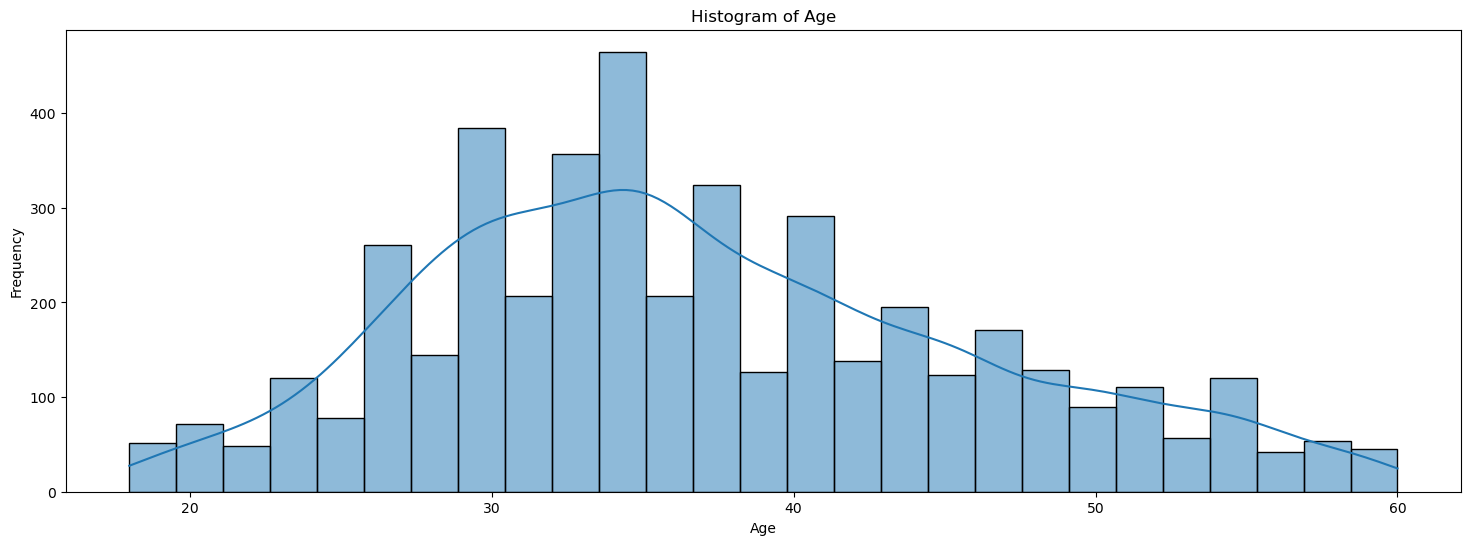

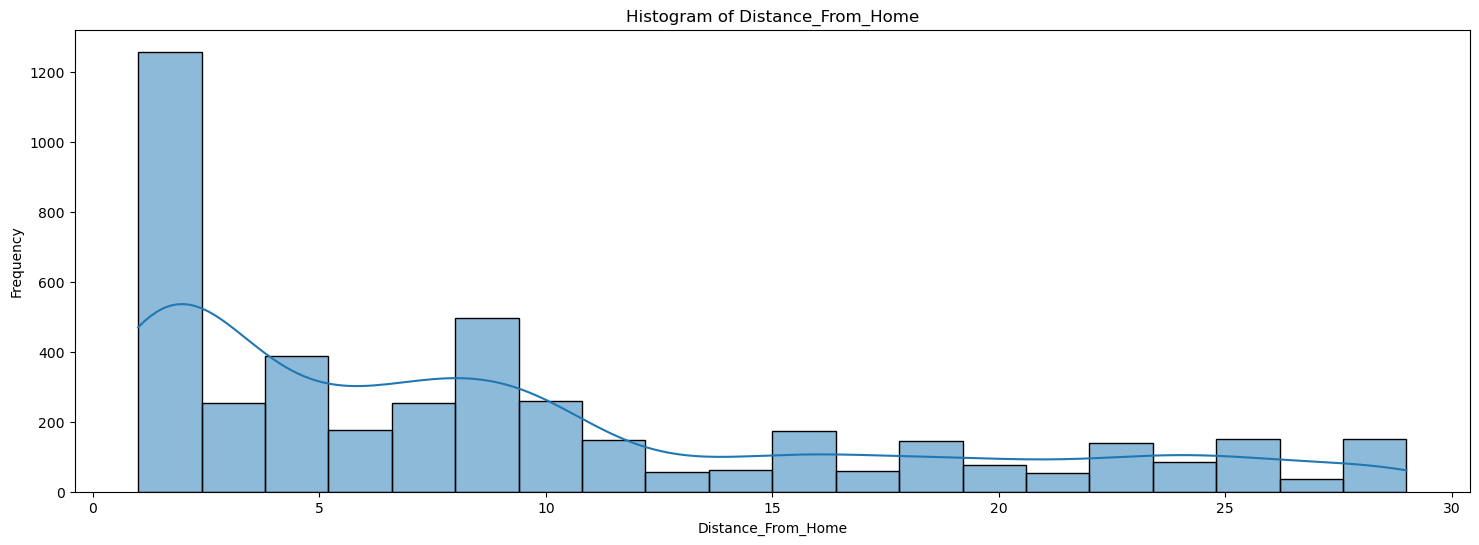

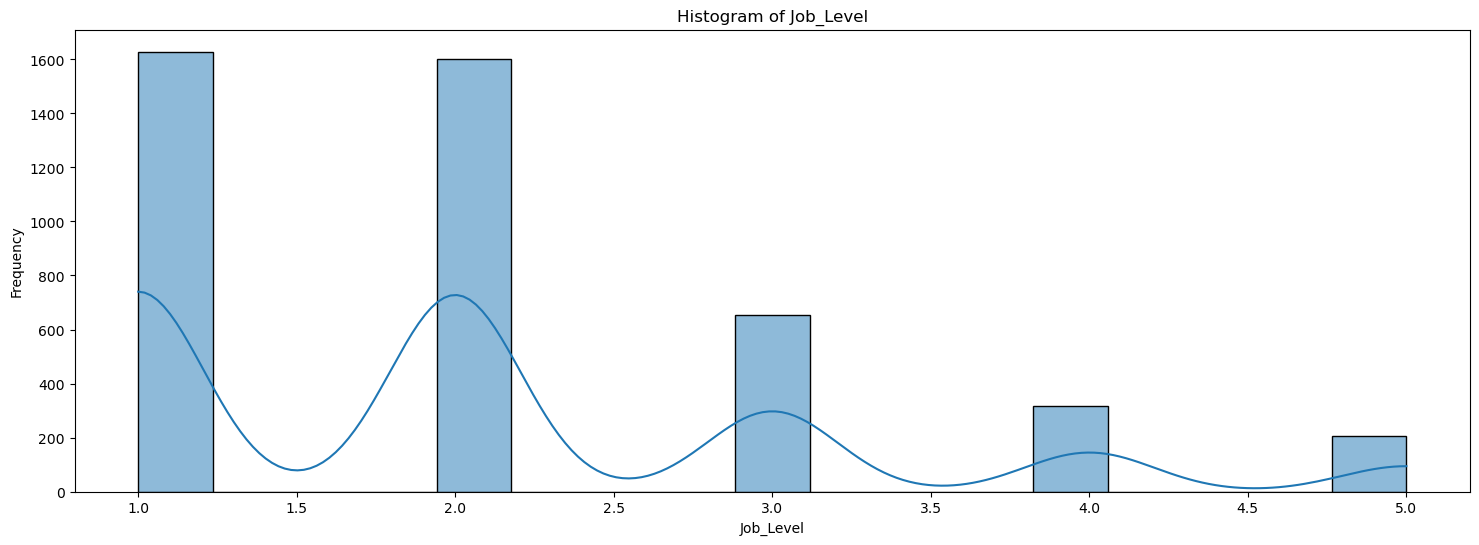

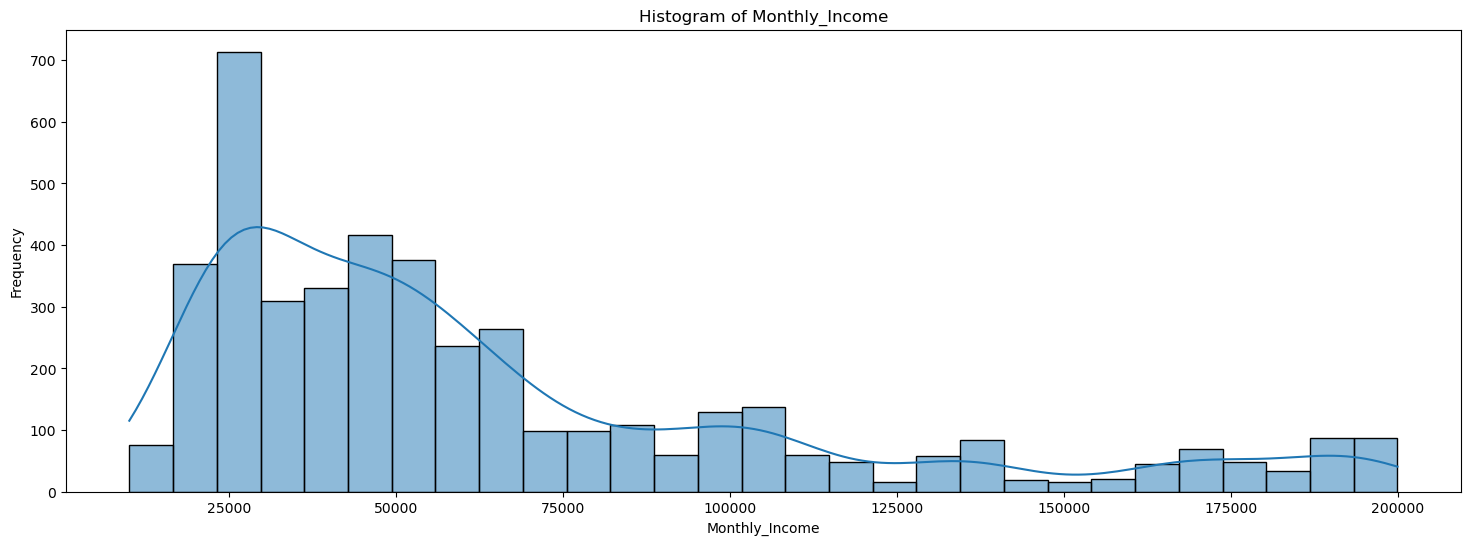

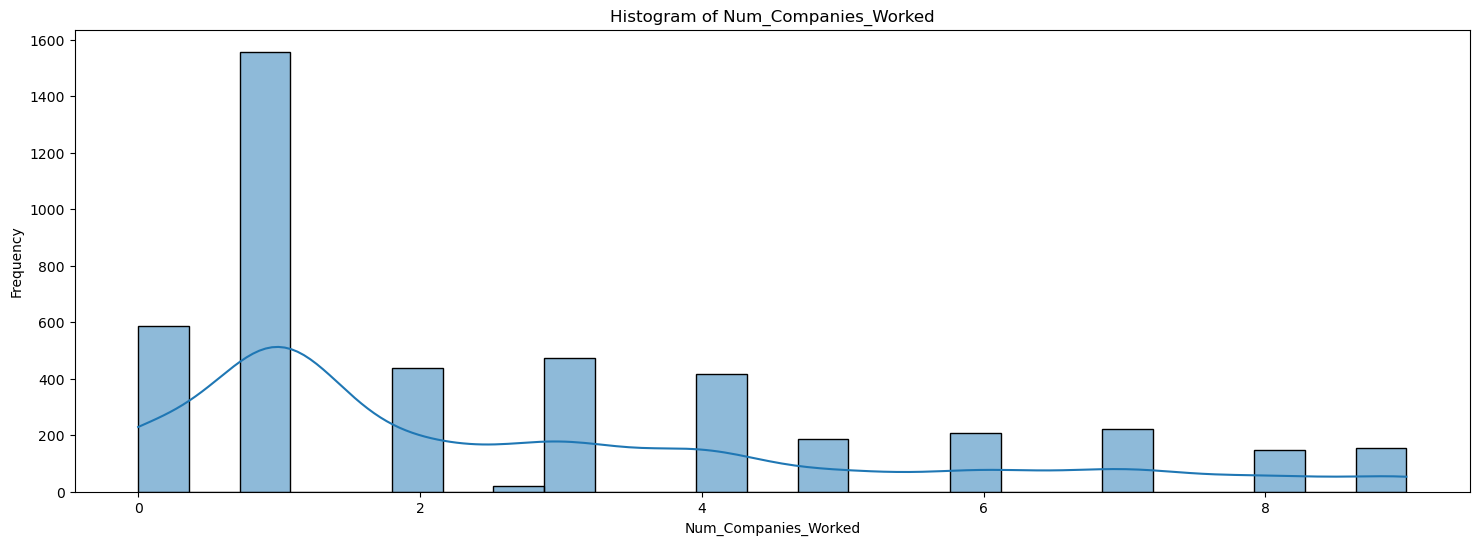

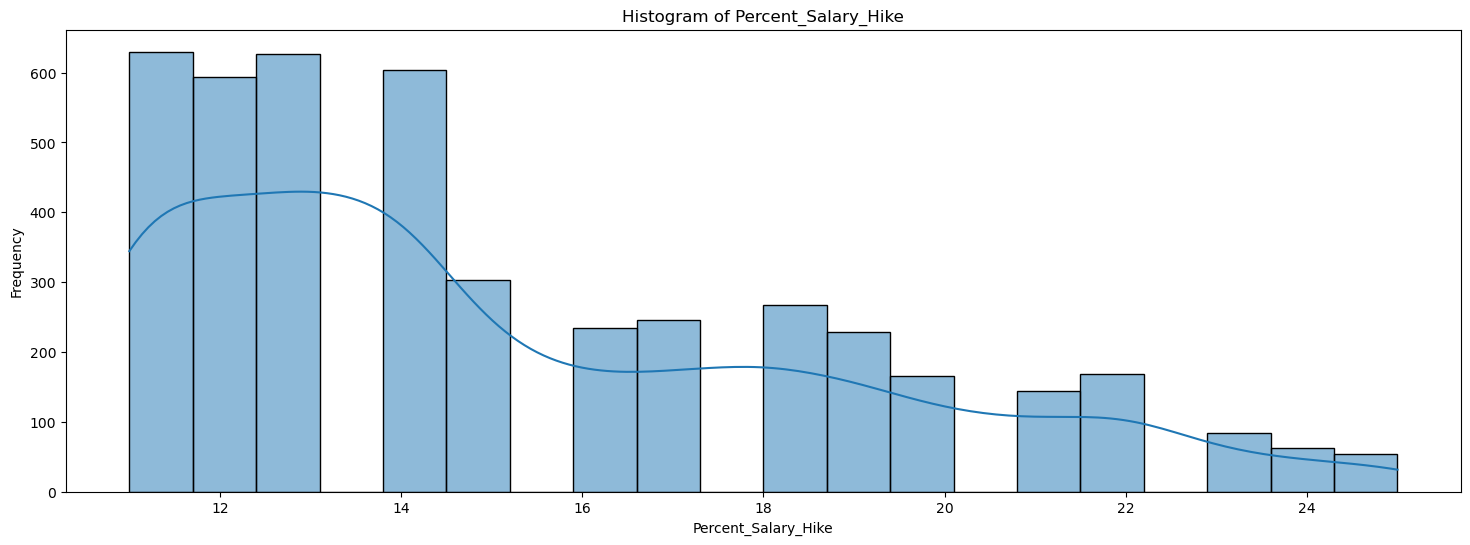

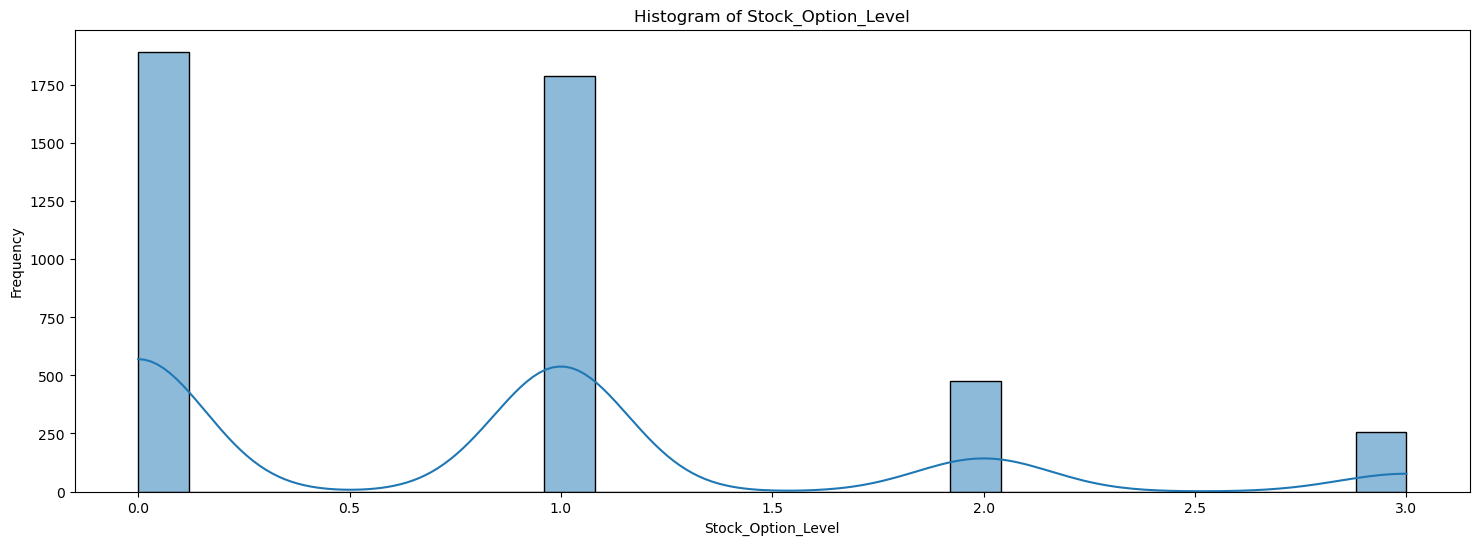

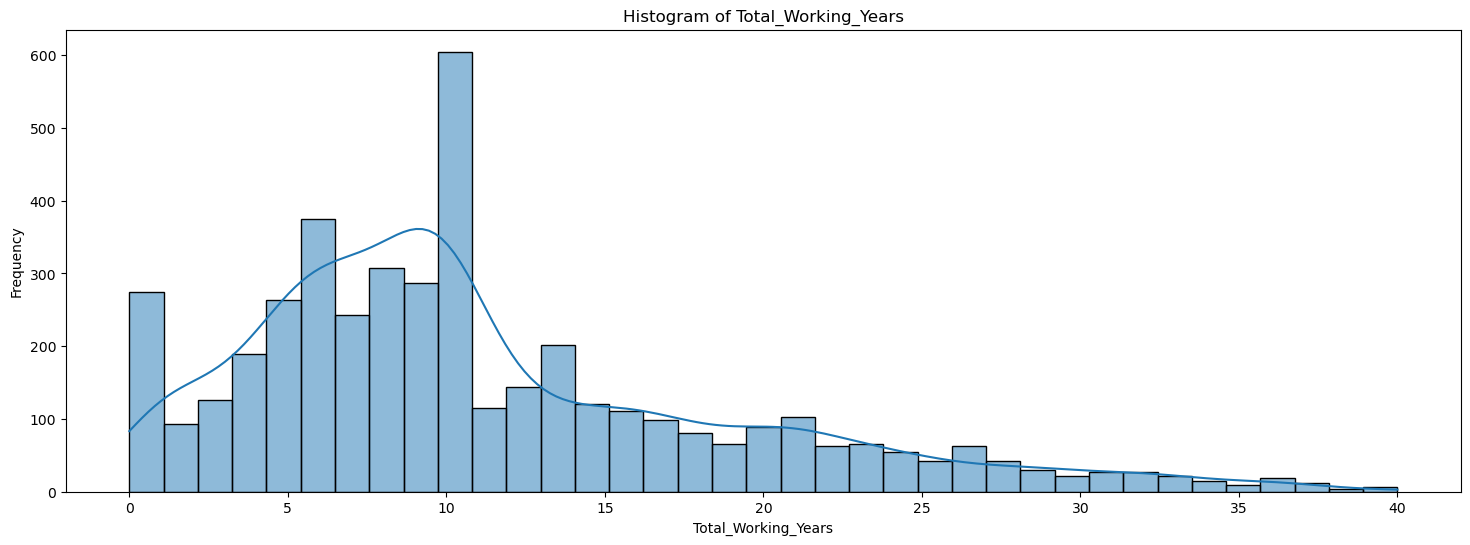

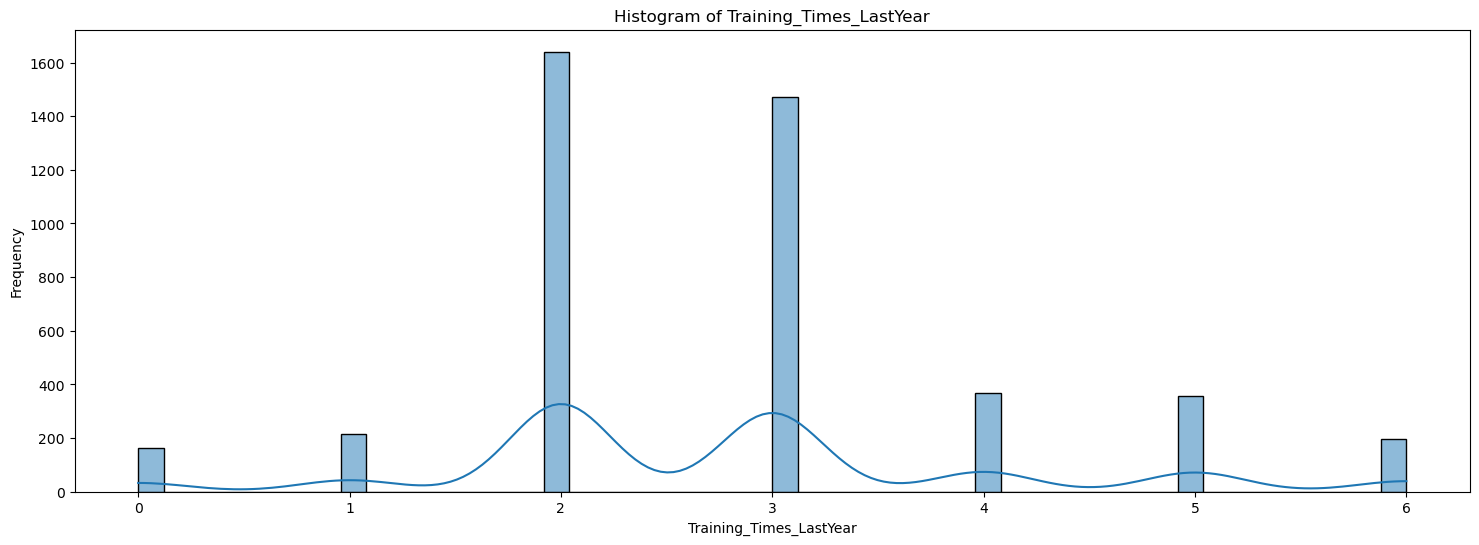

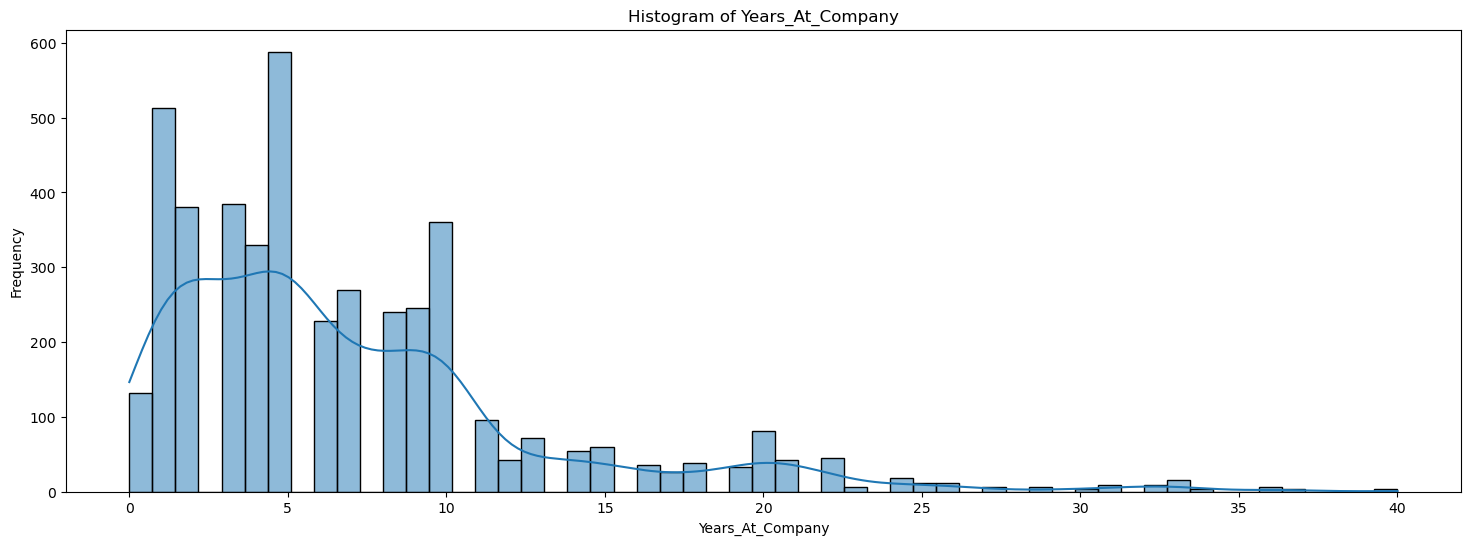

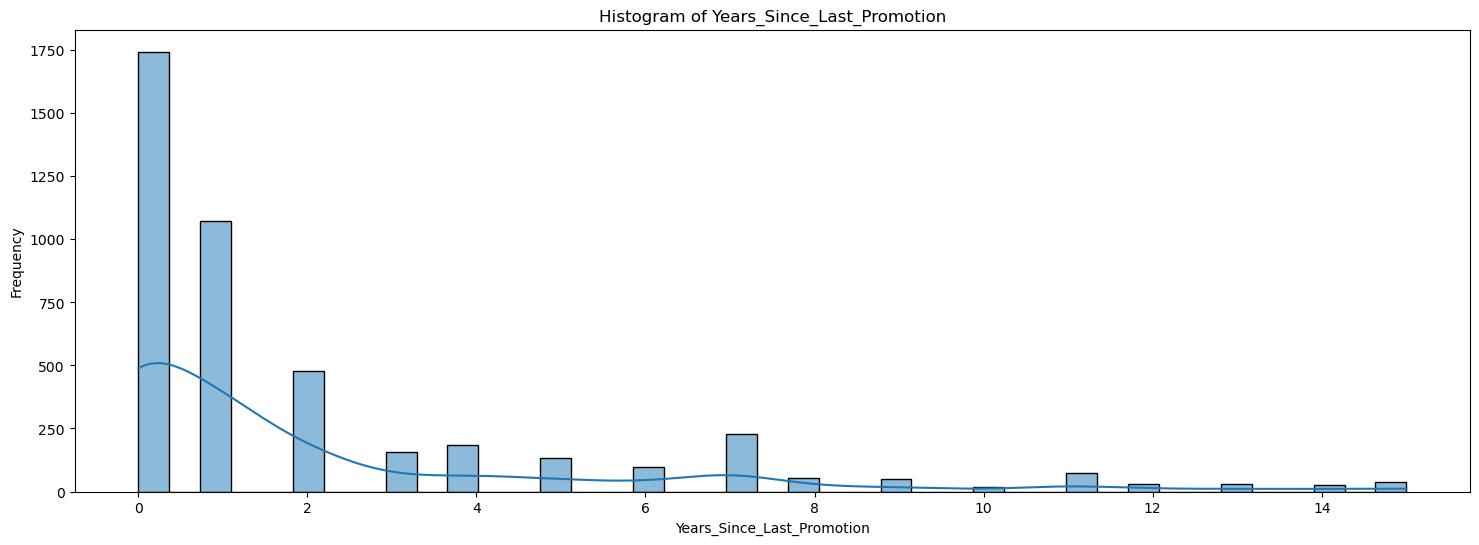

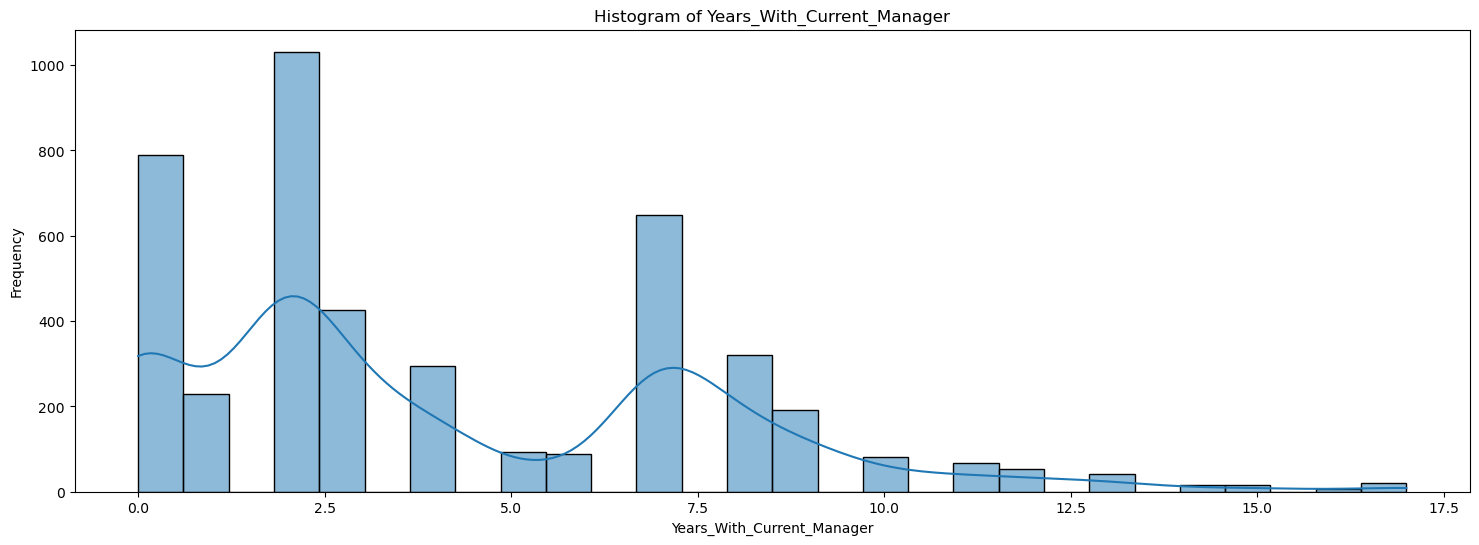

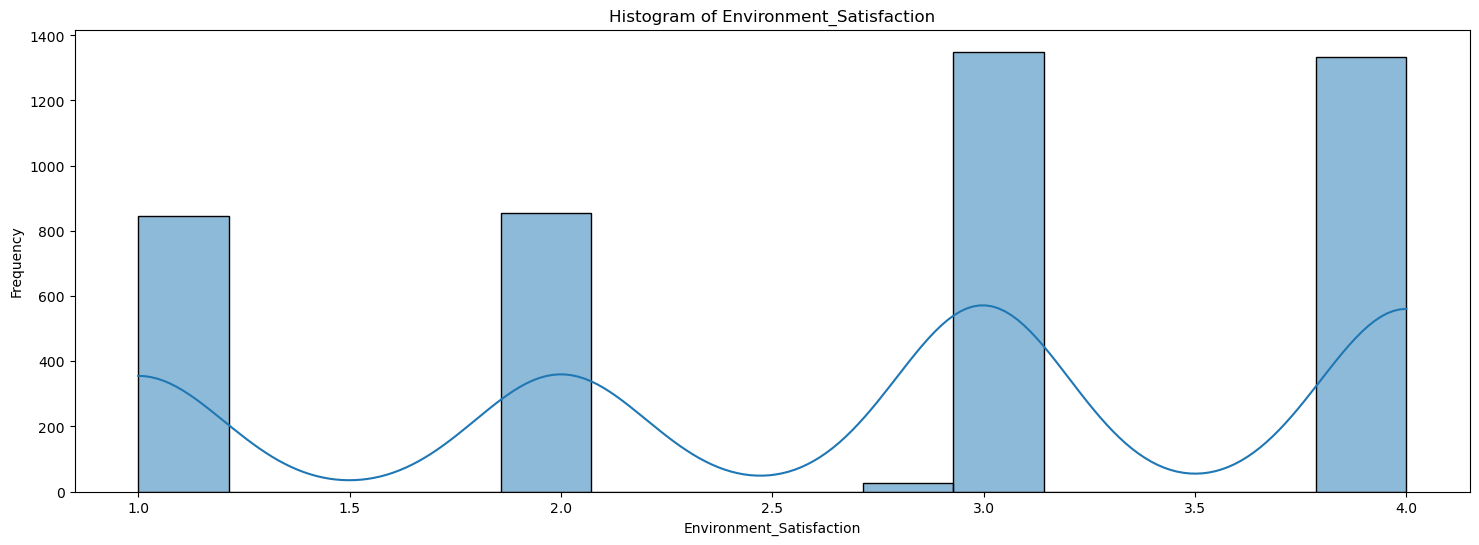

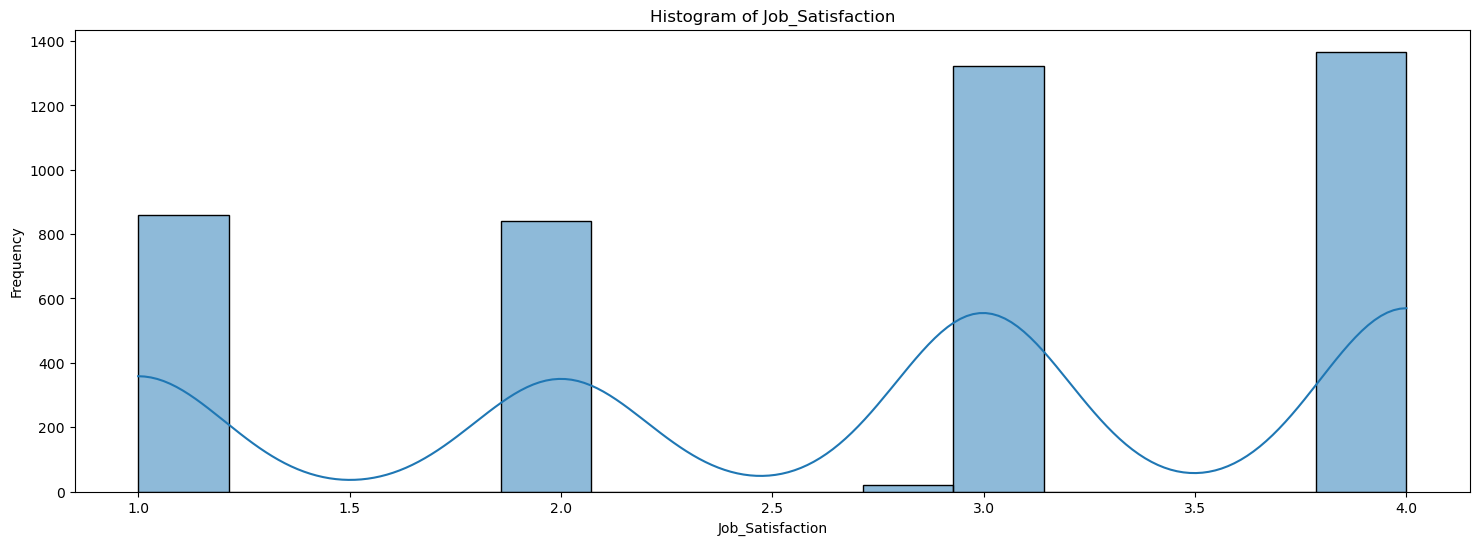

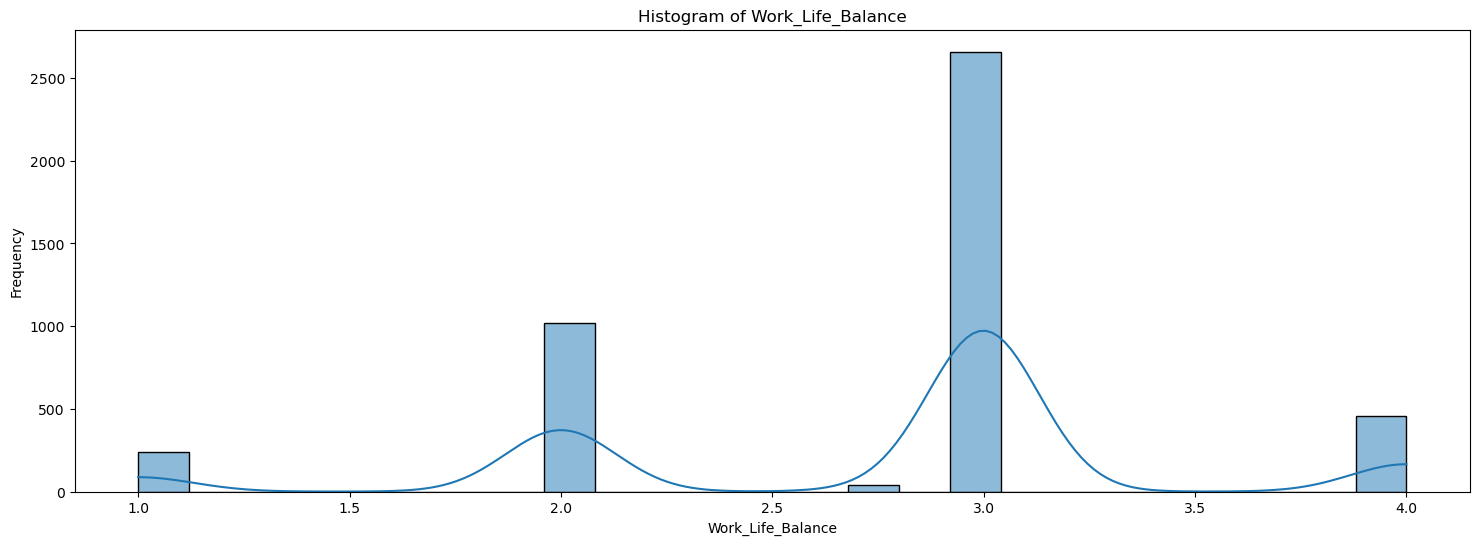

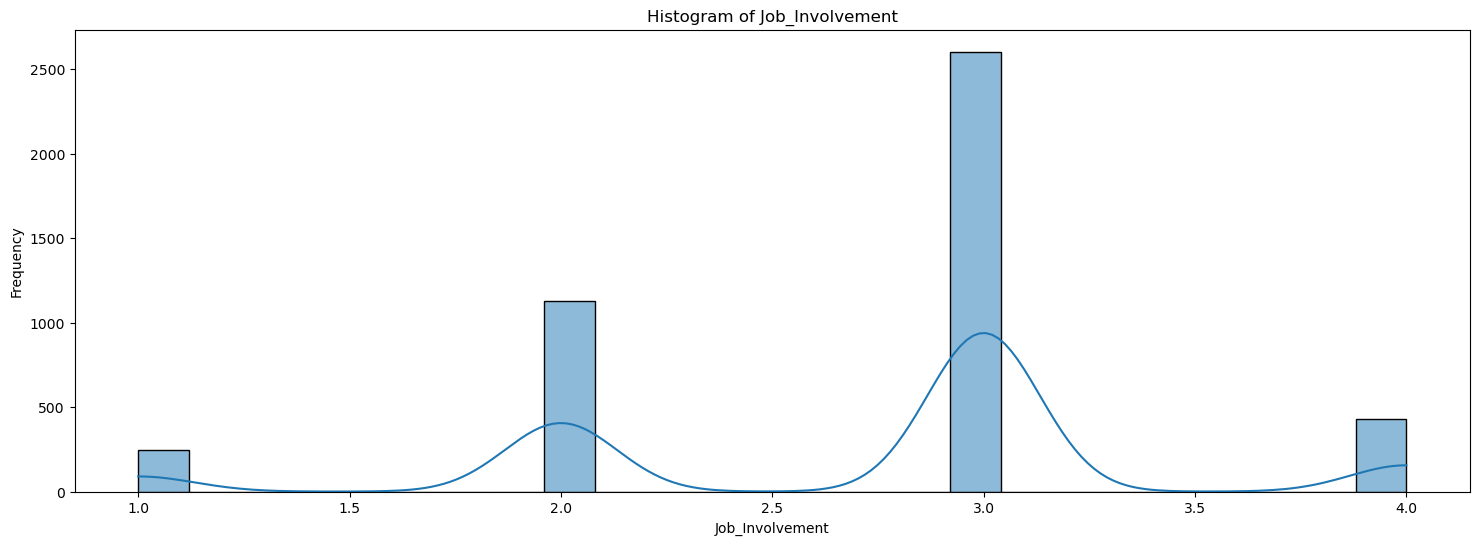

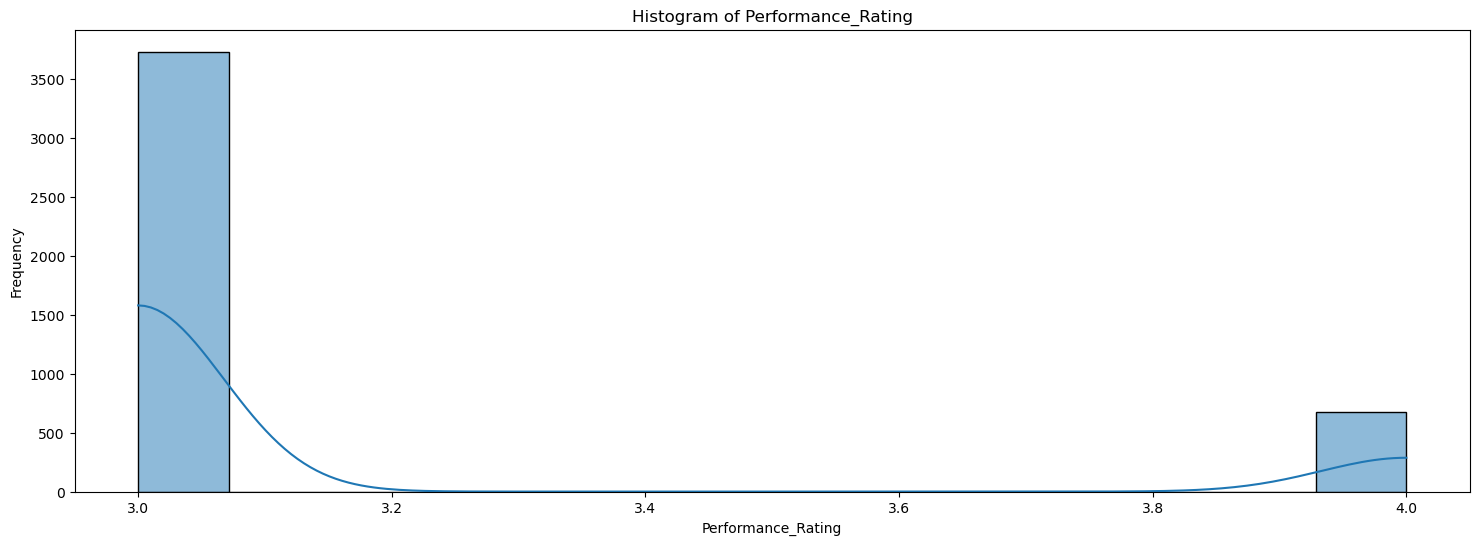

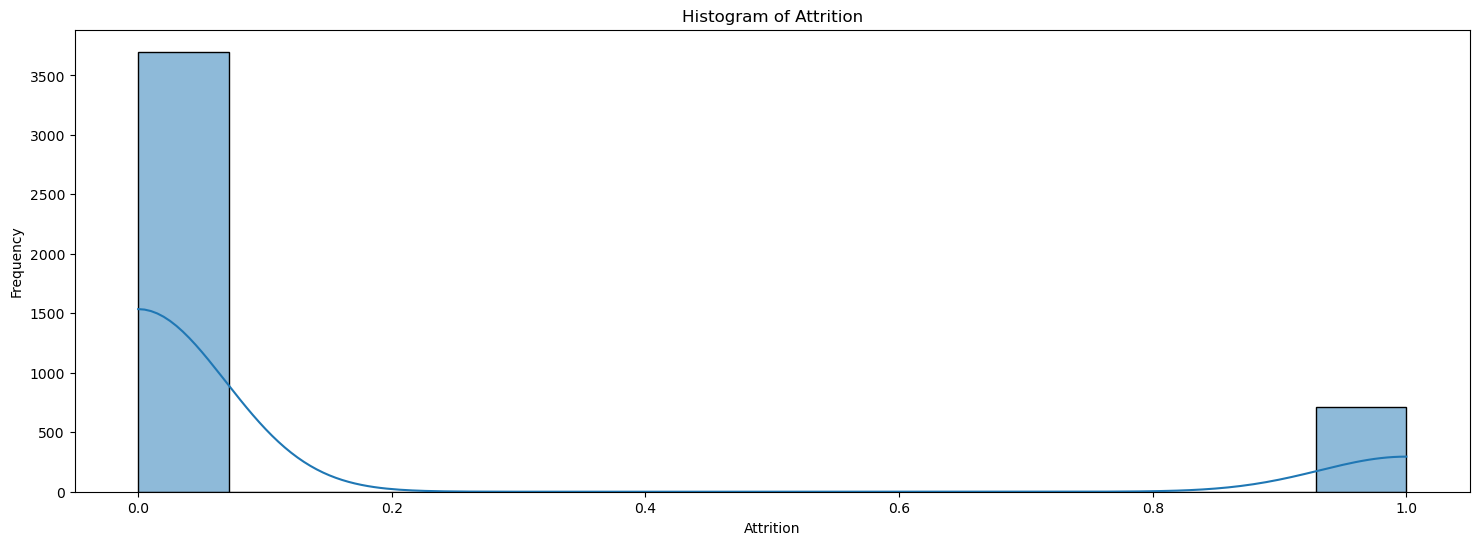

In [22]:
# Histplot
a = employ.iloc[:,7:25]
for i in a.columns:
    plt.figure(figsize=(18,6))
    sns.histplot(a[i], kde = True)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title(f'Histogram of {i}')
    plt.show()

<Axes: >

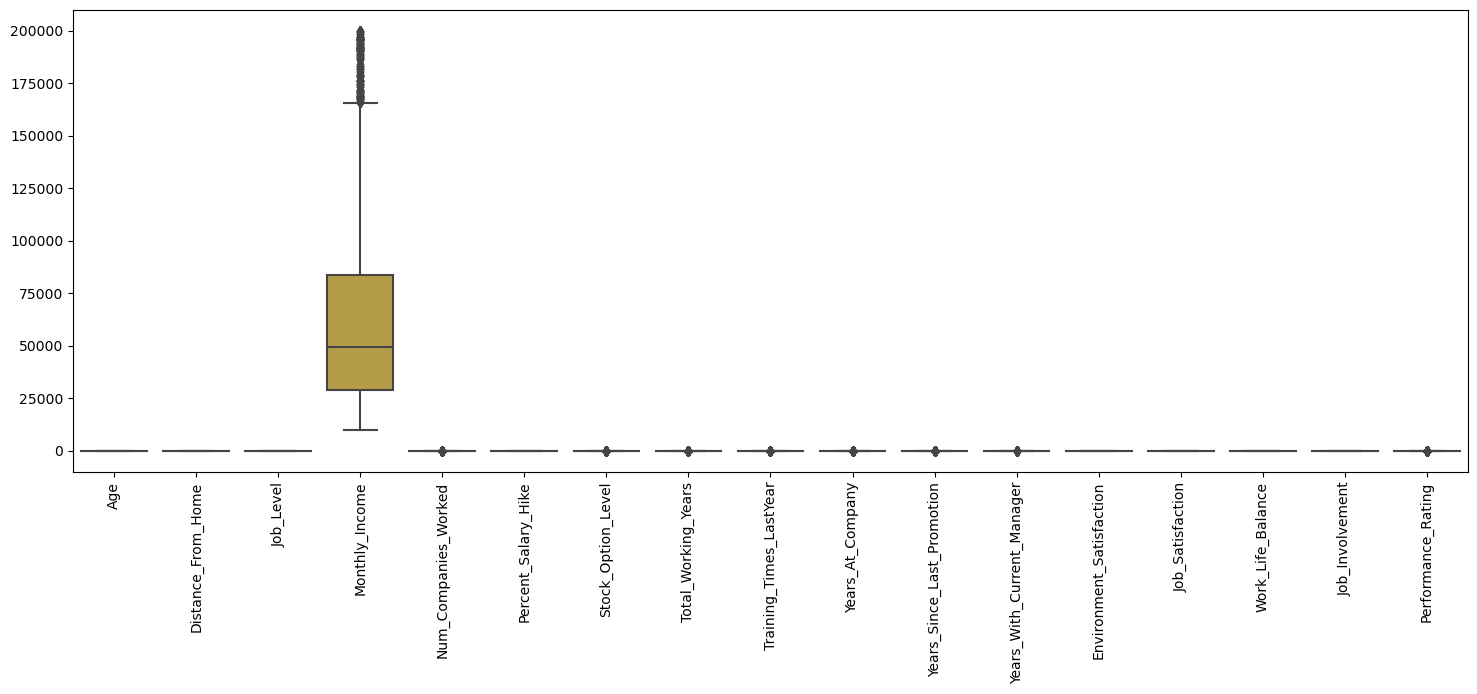

In [23]:
# checking for outliers
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.boxplot(employ[['Age','Distance_From_Home','Job_Level','Monthly_Income','Num_Companies_Worked','Percent_Salary_Hike',
                   'Stock_Option_Level','Total_Working_Years','Training_Times_LastYear','Years_At_Company','Years_Since_Last_Promotion',
                    'Years_With_Current_Manager','Environment_Satisfaction','Job_Satisfaction','Work_Life_Balance','Job_Involvement',
                    'Performance_Rating']])
                   

In [24]:
# Replacing outliers
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables=['Monthly_Income'])
employ['Monthly_Income'] = winsor.fit_transform(employ[['Monthly_Income']])

In [25]:
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables=['Num_Companies_Worked'])
employ['Num_Companies_Worked'] = winsor.fit_transform(employ[['Num_Companies_Worked']])

In [26]:
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables=['Stock_Option_Level'])
employ['Stock_Option_Level'] = winsor.fit_transform(employ[['Stock_Option_Level']])

In [27]:
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables=['Total_Working_Years'])
employ['Total_Working_Years'] = winsor.fit_transform(employ[['Total_Working_Years']])

In [28]:
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables=['Training_Times_LastYear'])
employ['Training_Times_LastYear'] = winsor.fit_transform(employ[['Training_Times_LastYear']])

In [29]:
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables=['Years_At_Company'])
employ['Years_At_Company'] = winsor.fit_transform(employ[['Years_At_Company']])

In [30]:
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables=['Years_Since_Last_Promotion'])
employ['Years_Since_Last_Promotion'] = winsor.fit_transform(employ[['Years_Since_Last_Promotion']])

In [31]:
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables=['Years_With_Current_Manager'])
employ['Years_With_Current_Manager'] = winsor.fit_transform(employ[['Years_With_Current_Manager']])

In [32]:
winsor = Winsorizer(capping_method = 'gaussian', tail = 'both', fold =.2, variables=['Performance_Rating'])
employ['Performance_Rating'] = winsor.fit_transform(employ[['Performance_Rating']])

<Axes: >

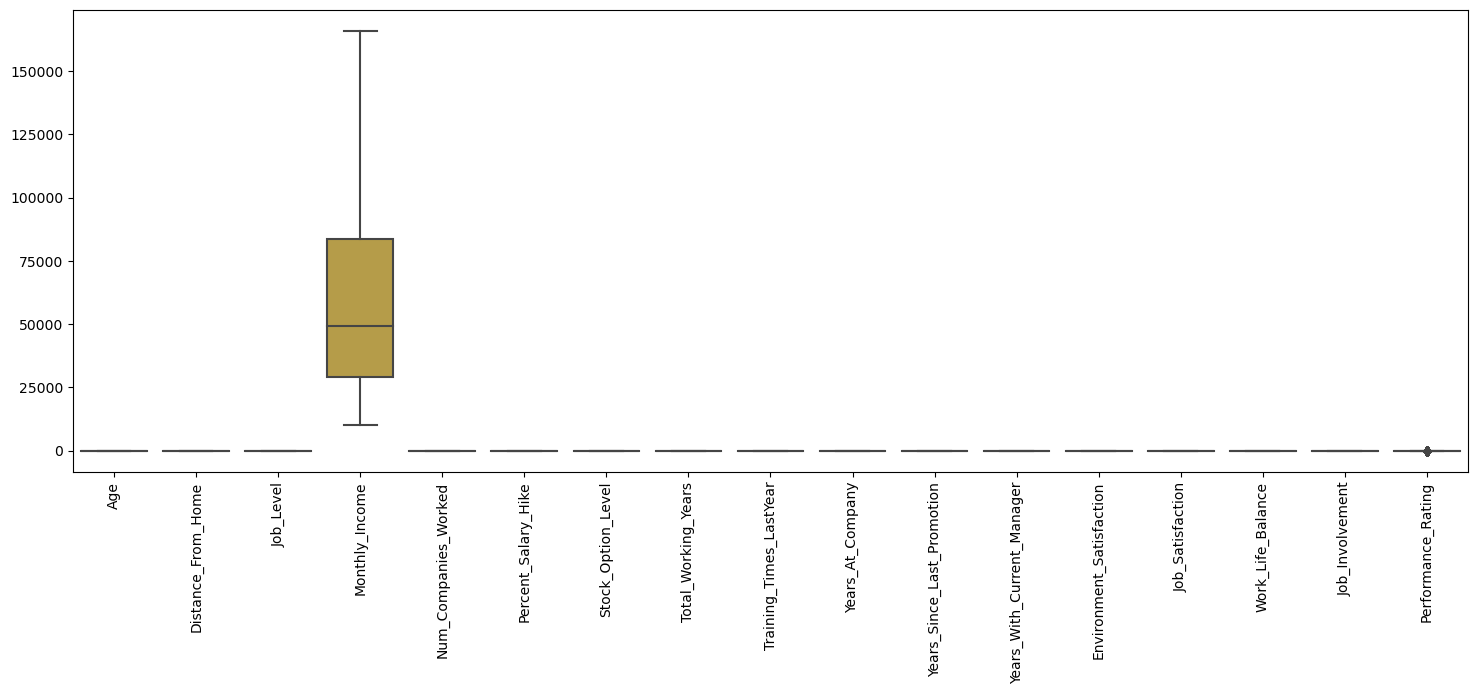

In [33]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.boxplot(employ[['Age','Distance_From_Home','Job_Level','Monthly_Income','Num_Companies_Worked','Percent_Salary_Hike',
                   'Stock_Option_Level','Total_Working_Years','Training_Times_LastYear','Years_At_Company','Years_Since_Last_Promotion',
                    'Years_With_Current_Manager','Environment_Satisfaction','Job_Satisfaction','Work_Life_Balance','Job_Involvement',
                    'Performance_Rating']])

In [34]:
# checking unique values
employ.nunique()

Employee_ID                   4410
Business_Travel                  3
Department                       3
Education_Field                  6
Gender                           2
Job_Role                         9
Marital_Status                   3
Age                             43
Distance_From_Home              29
Job_Level                        5
Monthly_Income                1238
Num_Companies_Worked            11
Percent_Salary_Hike             15
Stock_Option_Level               4
Total_Working_Years             31
Training_Times_LastYear          6
Years_At_Company                19
Years_Since_Last_Promotion       9
Years_With_Current_Manager      16
Environment_Satisfaction         5
Job_Satisfaction                 5
Work_Life_Balance                5
Job_Involvement                  4
Performance_Rating               2
Attrition                        2
dtype: int64

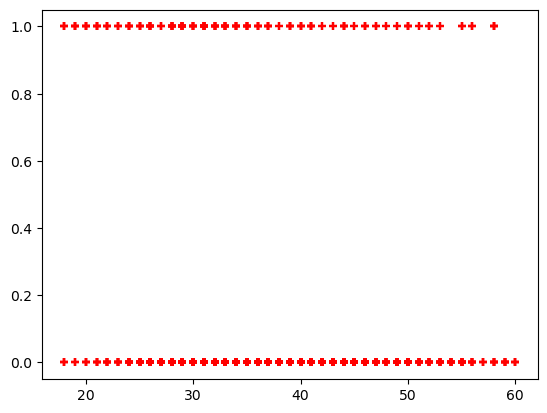

In [35]:
plt.scatter(employ.Age,employ.Attrition ,marker="+",color="red")

## Categorical Features

### Gender by Attrition

<Axes: xlabel='Gender', ylabel='count'>

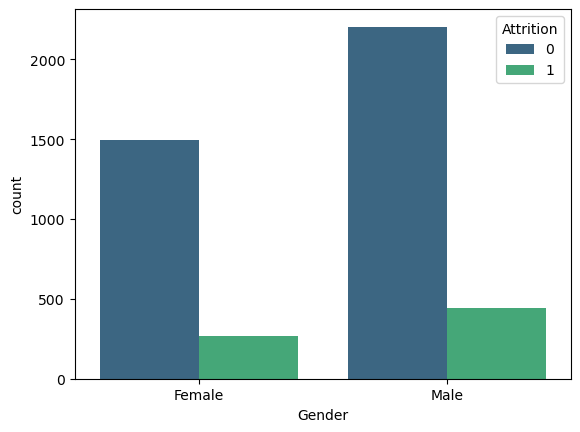

In [36]:
sns.countplot(data = employ, x = 'Gender', hue = 'Attrition',palette = 'viridis' )

In [37]:
employ['Gender'].value_counts(normalize=True)*100

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

In [38]:
employ.groupby(['Gender','Attrition']).size().reset_index(name='Count')

,Gender,Attrition,Count
0,Female,0,1494
1,Female,1,270
2,Male,0,2205
3,Male,1,441


**Observation:-**
* **From this graphical representation and value counts we can understand that number of male is more than female and attrition is also more in male category.**

### Department by Attrition

<Axes: xlabel='Department', ylabel='count'>

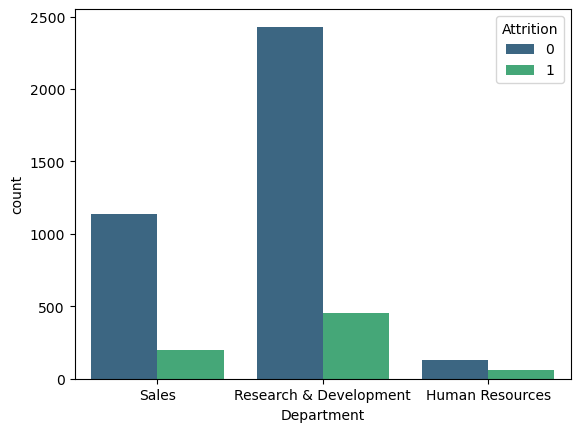

In [39]:
sns.countplot(data = employ, x = 'Department', hue = 'Attrition', palette = 'viridis')

In [40]:
Department_crosstab = pd.crosstab(employ['Department'], employ['Attrition'], normalize = 'index')*100
Department_crosstab

Attrition,0,1
Department,,
Human Resources,69.841270,30.158730
Research & Development,84.287201,15.712799
Sales,84.977578,15.022422


In [41]:
employ.groupby(['Department','Attrition']).size().reset_index(name='Count')

,Department,Attrition,Count
0,Human Resources,0,132
1,Human Resources,1,57
2,Research & Development,0,2430
3,Research & Development,1,453
4,Sales,0,1137
5,Sales,1,201


**Observation:-**
* **From this graphical representation and value counts we can understand that attrition is lower in Human Resources and higher number of employees in Research & Development.**

### Job Role by Attrition

<Axes: xlabel='Job_Role', ylabel='count'>

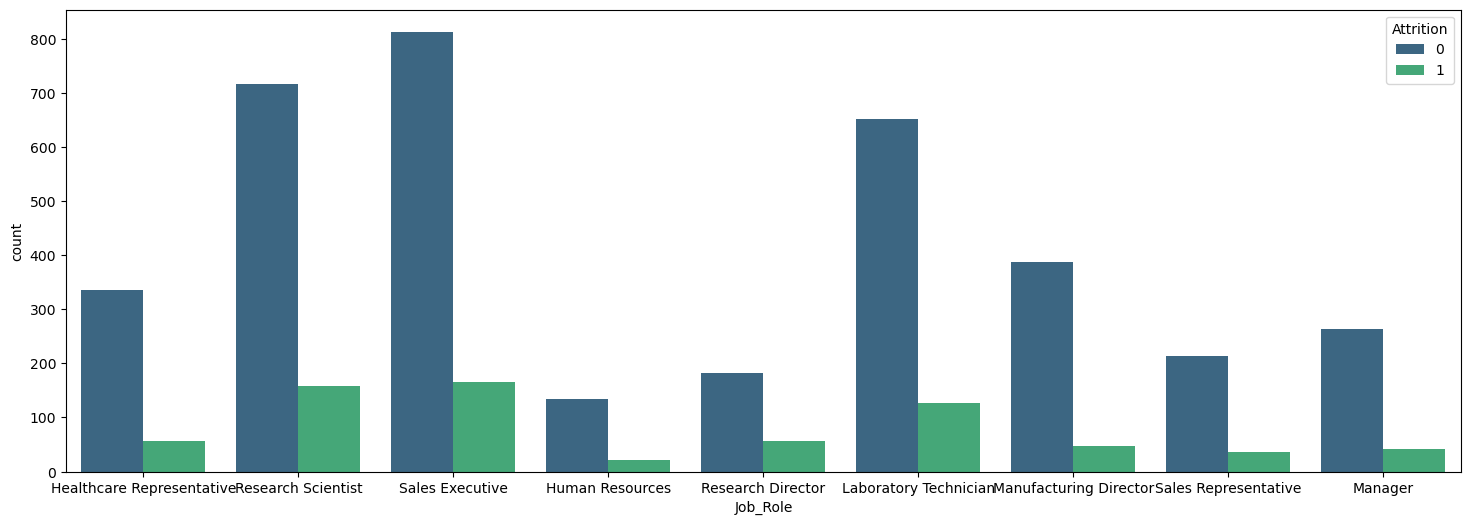

In [42]:
plt.figure(figsize=(18,6))
sns.countplot(data = employ, x = 'Job_Role', hue = 'Attrition', palette = 'viridis')

In [43]:
Job_Role_crosstab = pd.crosstab(employ['Job_Role'], employ['Attrition'], normalize = 'index')*100
Job_Role_crosstab

Attrition,0,1
Job_Role,,
Healthcare Representative,85.496183,14.503817
Human Resources,86.538462,13.461538
Laboratory Technician,83.783784,16.216216
Manager,86.274510,13.725490
Manufacturing Director,88.965517,11.034483
Research Director,76.250000,23.750000
Research Scientist,81.849315,18.150685
Sales Executive,83.128834,16.871166
Sales Representative,85.542169,14.457831


In [44]:
employ.groupby(['Job_Role','Attrition']).size().reset_index(name='Count')

,Job_Role,Attrition,Count
0,Healthcare Representative,0,336
1,Healthcare Representative,1,57
2,Human Resources,0,135
3,Human Resources,1,21
4,Laboratory Technician,0,651
5,Laboratory Technician,1,126
6,Manager,0,264
7,Manager,1,42
8,Manufacturing Director,0,387
9,Manufacturing Director,1,48


**Observation:-**
* **From the above graphs and tables we can say that Sales Executive job role have higher attrition rate and lower for Human Resources.**

### Education_Field by Attrition

<Axes: xlabel='Education_Field', ylabel='count'>

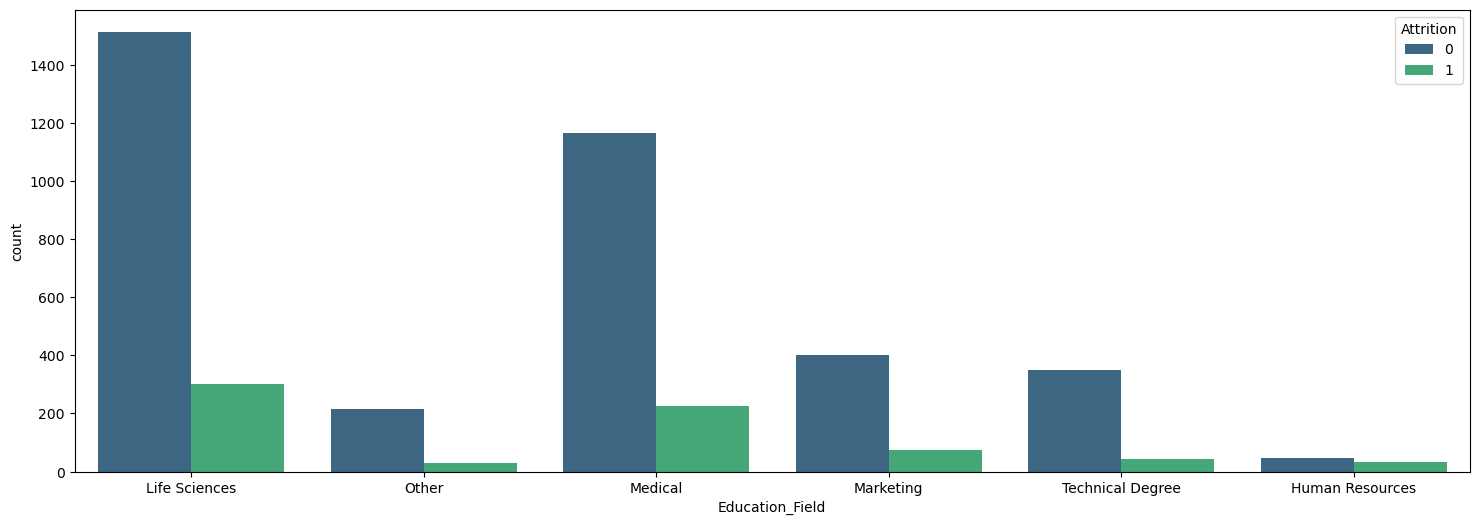

In [45]:
plt.figure(figsize=(18,6))
sns.countplot(data = employ, x = 'Education_Field', hue = 'Attrition', palette = 'viridis')

In [46]:
Education_Field_crosstab = pd.crosstab(employ['Education_Field'], employ['Attrition'], normalize = 'index')*100
Education_Field_crosstab

Attrition,0,1
Education_Field,,
Human Resources,59.259259,40.740741
Life Sciences,83.333333,16.666667
Marketing,84.276730,15.723270
Medical,83.836207,16.163793
Other,87.804878,12.195122
Technical Degree,88.636364,11.363636


In [47]:
employ.groupby(['Education_Field','Attrition']).size().reset_index(name='Count')

,Education_Field,Attrition,Count
0,Human Resources,0,48
1,Human Resources,1,33
2,Life Sciences,0,1515
3,Life Sciences,1,303
4,Marketing,0,402
5,Marketing,1,75
6,Medical,0,1167
7,Medical,1,225
8,Other,0,216
9,Other,1,30


**Observation:-**
* **Here we can see that Attrition is higher in Life Sciences graduates.**

### Business_Travel

<Axes: xlabel='Business_Travel', ylabel='count'>

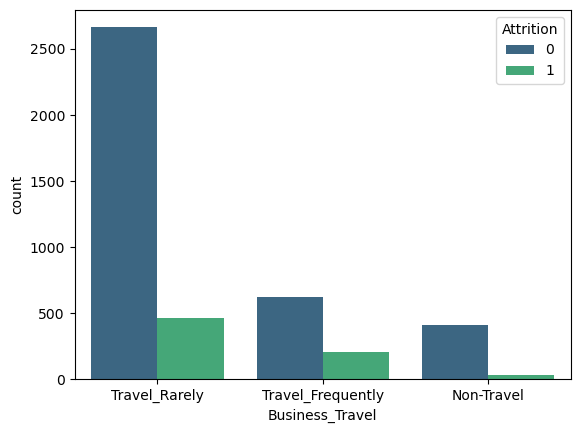

In [48]:
sns.countplot(data = employ, x = 'Business_Travel', hue = 'Attrition', palette = 'viridis')

In [49]:
Business_Travel_crosstab = pd.crosstab(employ['Business_Travel'], employ['Attrition'], normalize = 'index')*100
Business_Travel_crosstab

Attrition,0,1
Business_Travel,,
Non-Travel,92.000000,8.000000
Travel_Frequently,75.090253,24.909747
Travel_Rarely,85.043145,14.956855


In [50]:
employ.groupby(['Business_Travel','Attrition']).size().reset_index(name='Count')

,Business_Travel,Attrition,Count
0,Non-Travel,0,414
1,Non-Travel,1,36
2,Travel_Frequently,0,624
3,Travel_Frequently,1,207
4,Travel_Rarely,0,2661
5,Travel_Rarely,1,468


**Note:-**
* **Here we can clearly see that more people in work are stable on Non-Travel positions and people who are likely to leave job who are in Travel_Frequently jobs.**

### Marital_Status by Attrition

<Axes: xlabel='Marital_Status', ylabel='count'>

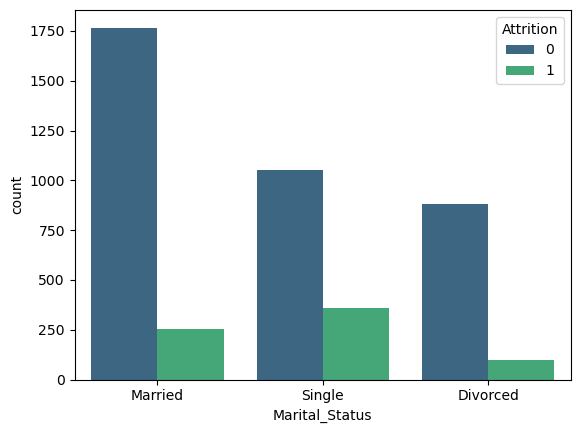

In [51]:
sns.countplot(data = employ, x = 'Marital_Status', hue = 'Attrition', palette = 'viridis')

In [52]:
Marital_Status_crosstab = pd.crosstab(employ['Marital_Status'], employ['Attrition'], normalize = 'index')*100
Marital_Status_crosstab

Attrition,0,1
Marital_Status,,
Divorced,89.908257,10.091743
Married,87.518574,12.481426
Single,74.468085,25.531915


In [53]:
employ.groupby(['Marital_Status','Attrition']).size().reset_index(name='Count')

,Marital_Status,Attrition,Count
0,Divorced,0,882
1,Divorced,1,99
2,Married,0,1767
3,Married,1,252
4,Single,0,1050
5,Single,1,360


**Observation:-**
* **From the above diagrams it shows that single people are more likely to leave organisation than married and divorced.**

## Numerical Features

### Business_Travel & Job_Level by Attrition

<Axes: xlabel='Business_Travel', ylabel='Job_Level'>

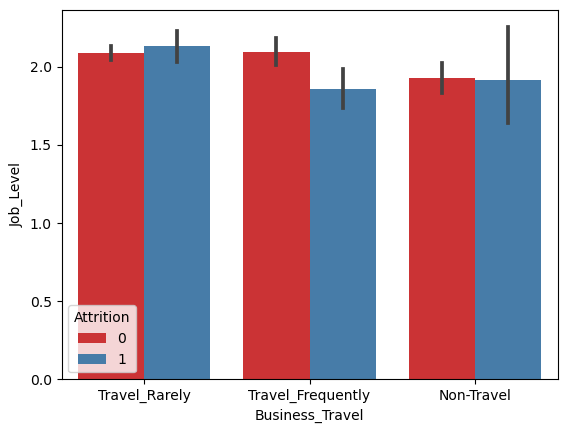

In [54]:
sns.barplot(x='Business_Travel', y='Job_Level', hue='Attrition', data=employ, palette = 'Set1')

**Observation:-**
* **From above graph we can understand that employees who travel_rarely with entry job_level position has higher attrition rate.**

### Business_Travel & Age by Attrition

<Axes: xlabel='Business_Travel', ylabel='Age'>

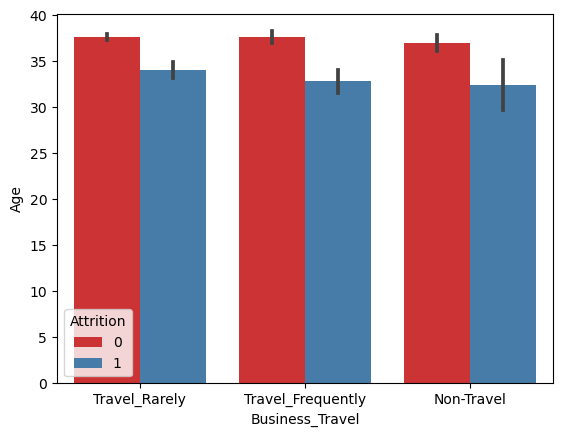

In [55]:
sns.barplot(x='Business_Travel', y='Age', hue='Attrition', data=employ, palette = 'Set1')

**Observation:-**
* **From above graph we can understand that employees who travel_rarely in the age group between 30 to 35 has higher attrition rate.**

### Business_Travel & Years_Since_Last_Promotion by Attrition

<Axes: xlabel='Business_Travel', ylabel='Years_Since_Last_Promotion'>

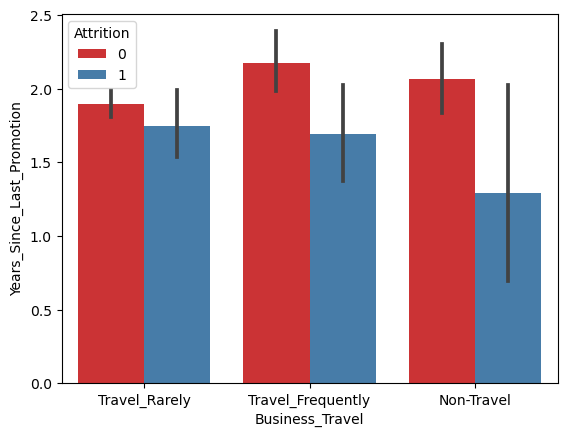

In [56]:
sns.barplot(x='Business_Travel', y='Years_Since_Last_Promotion', hue='Attrition', data=employ, palette = 'Set1')

 **Observation:-**
* **From above graph we can understand that higher attrition occurs when years of promotion below 2 years.**

### Education_Field & Training_Times_LastYear by Attrition

<Axes: xlabel='Education_Field', ylabel='Training_Times_LastYear'>

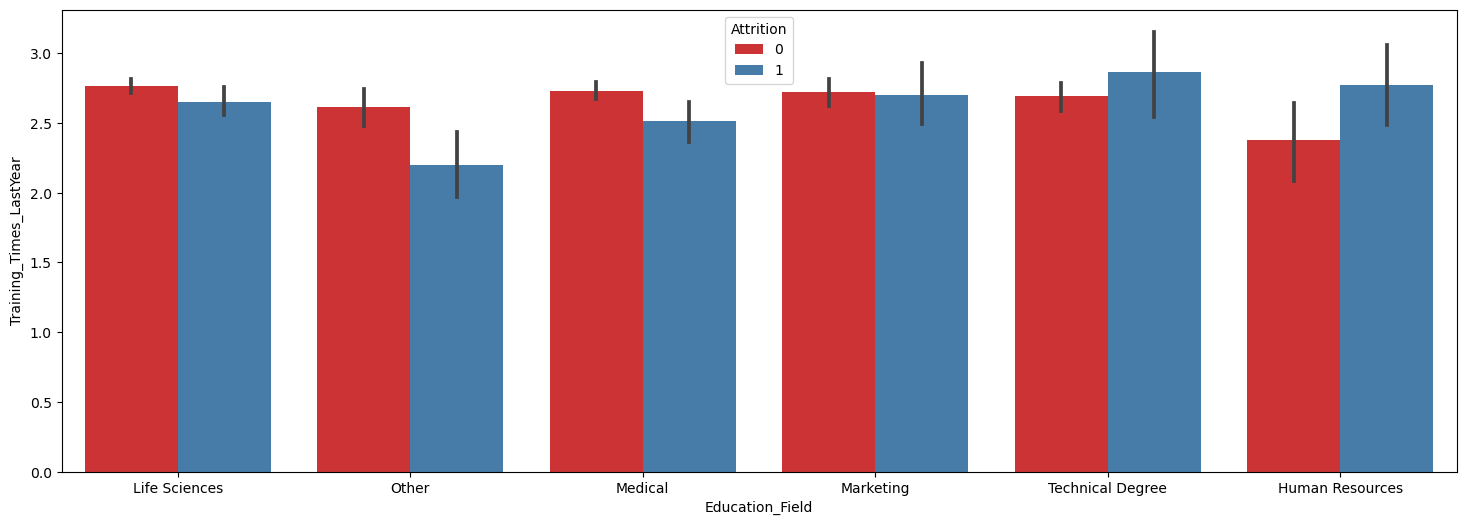

In [57]:
plt.figure(figsize = (18,6))
sns.barplot(x='Education_Field', y='Training_Times_LastYear', hue='Attrition', data=employ, palette = 'Set1')

**Observation:-**
* **Organisation provides more training for technical background employees and attrition is also higher in that feild.**

### Education_Field & Percent_Salary_Hike by Attrition

<Axes: xlabel='Education_Field', ylabel='Percent_Salary_Hike'>

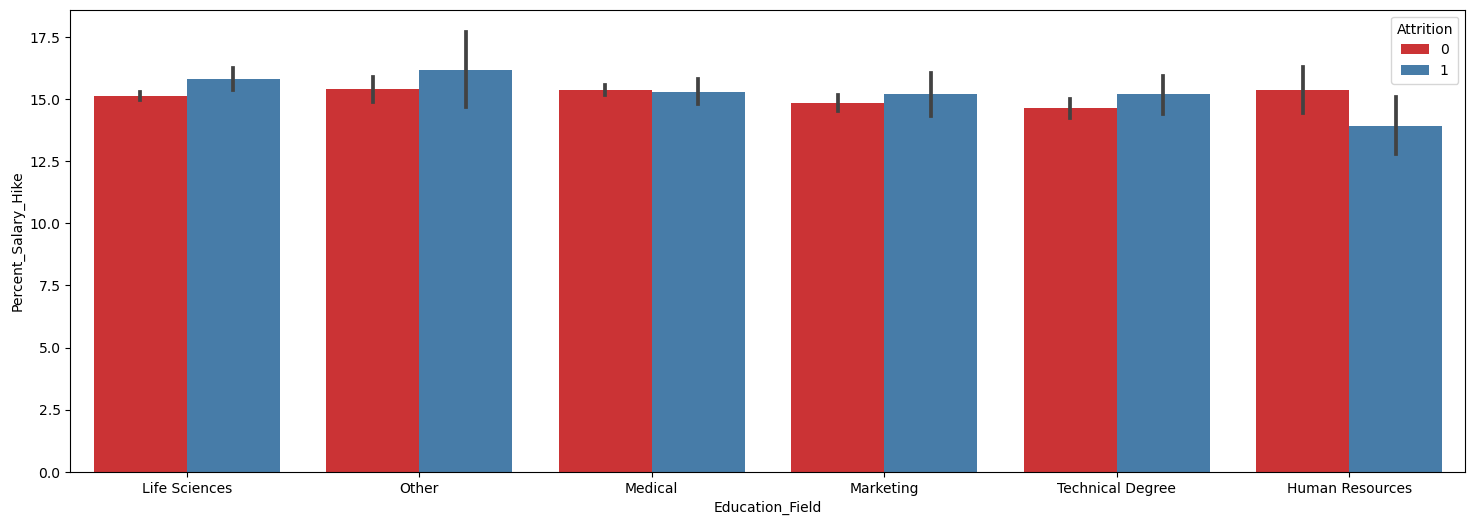

In [58]:
plt.figure(figsize = (18,6))
sns.barplot(x='Education_Field', y='Percent_Salary_Hike', hue='Attrition', data=employ, palette = 'Set1')

**Observation:-**
* **Salary hike is more in Other degree holders, and attrition rate is highest in that particular employes.**

### Education_Field & Years_At_Company by Attrition

<Axes: xlabel='Education_Field', ylabel='Years_At_Company'>

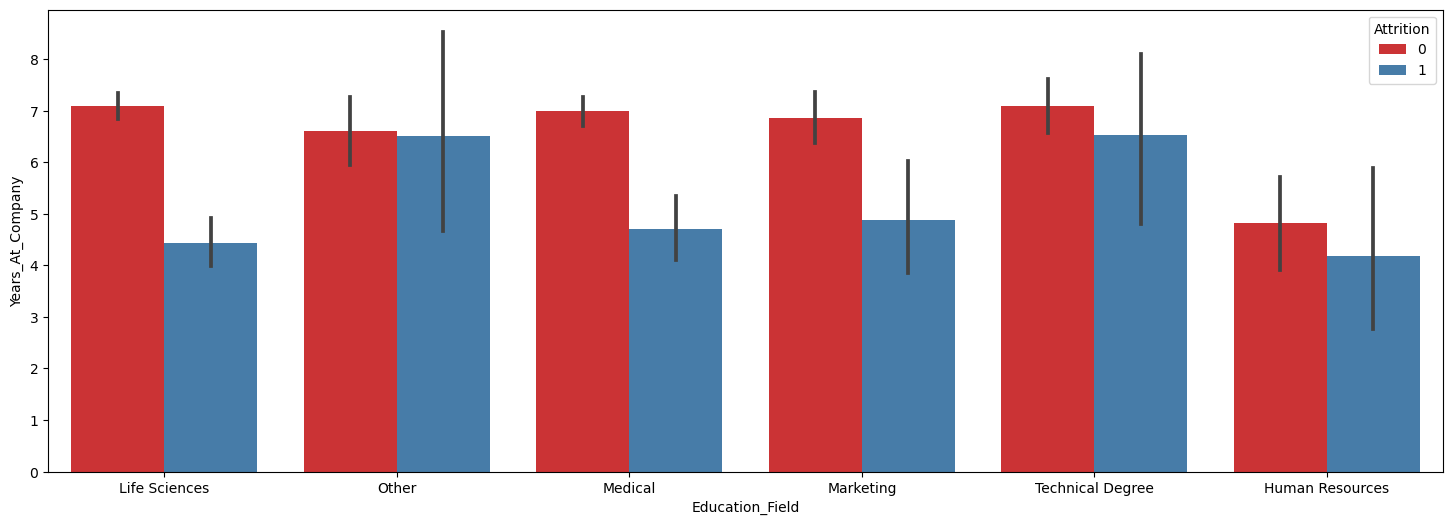

In [59]:
plt.figure(figsize = (18,6))
sns.barplot(x='Education_Field', y='Years_At_Company', hue='Attrition', data=employ, palette = 'Set1')

**Observation:-**
* **Life science eduction background employess are more stable than others their attrition rate is lower and highest is for other degree holders.**

## Attrition 

<Axes: xlabel='Attrition', ylabel='count'>

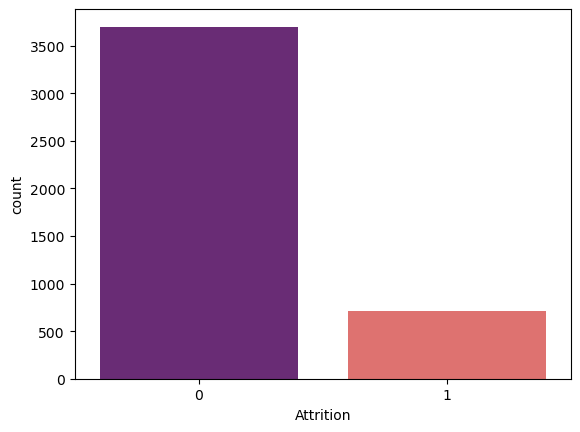

In [60]:
sns.countplot(data = employ, x = 'Attrition', palette='magma')

In [61]:
employ['Attrition'].value_counts(normalize=True)*100

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64

* **From the above we can see that data imbalance is there, So we need to use smotek technique for balancing data.**

Attrition
0    3699
1     711
Name: count, dtype: int64
**************************************************


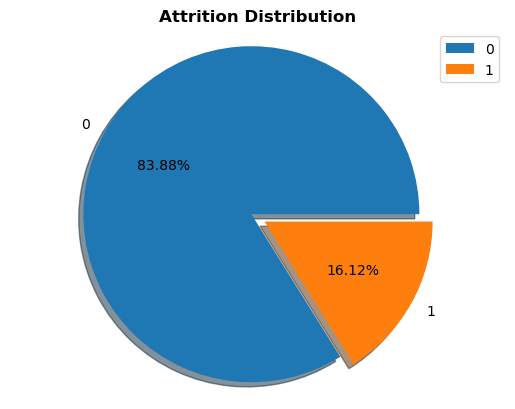

In [62]:
Attrition_count = employ["Attrition"].value_counts()
print(Attrition_count)
print("*"*50)

## Create a pie chart
plt.pie(x = Attrition_count.values, labels = Attrition_count.index, autopct="%0.2f%%", shadow=True, explode=(0, 0.09))

## title
plt.title("Attrition Distribution", weight="bold")

## Customize the styling
plt.axis("equal")  # Set the aspect ratio to make the pie circular

## Add a legend
plt.legend(loc='best')

## Show the plot
plt.show()

In [63]:
# encoding
df_encoded = pd.get_dummies(employ, columns=['Business_Travel', 'Department', 'Education_Field', 'Gender','Job_Role', 'Marital_Status'])
empo = df_encoded.astype('int64')
empo

,Employee_ID,Age,Distance_From_Home,Job_Level,Monthly_Income,Num_Companies_Worked,Percent_Salary_Hike,Stock_Option_Level,Total_Working_Years,Training_Times_LastYear,...,Job_Role_Laboratory Technician,Job_Role_Manager,Job_Role_Manufacturing Director,Job_Role_Research Director,Job_Role_Research Scientist,Job_Role_Sales Executive,Job_Role_Sales Representative,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,51,6,1,131160,1,11,0,1,4,...,0,0,0,0,0,0,0,0,1,0
1,2,31,10,1,41890,0,23,1,6,3,...,0,0,0,0,1,0,0,0,0,1
2,3,32,17,4,165835,1,15,2,5,2,...,0,0,0,0,0,1,0,0,1,0
3,4,38,2,3,83210,3,11,2,13,4,...,0,0,0,0,0,0,0,0,1,0
4,5,32,10,1,23420,4,12,2,9,2,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,5,1,60290,3,17,1,10,4,...,0,0,0,0,1,0,0,0,0,1
4406,4407,29,2,1,26790,2,15,0,10,2,...,1,0,0,0,0,0,0,1,0,0
4407,4408,25,25,2,37020,0,20,0,5,4,...,0,0,0,0,0,1,0,0,1,0
4408,4409,42,18,1,23980,0,14,1,10,2,...,1,0,0,0,0,0,0,1,0,0


In [64]:
# normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
empo1 = scaler.fit_transform(empo)
dataset = pd.DataFrame(empo1)
employee = dataset.describe
employee

<bound method NDFrame.describe of             0         1         2         3         4         5         6   \
0    -1.731658  1.541369 -0.393938 -0.961486  1.551796 -0.687452 -1.150554   
1    -1.730873 -0.648668  0.099639 -0.961486 -0.499294 -1.102464  2.129306   
2    -1.730087 -0.539166  0.963398  1.749610  2.348498 -0.687452 -0.057267   
3    -1.729302  0.117845 -0.887515  0.845911  0.450085  0.142572 -1.150554   
4    -1.728516 -0.539166  0.099639 -0.961486 -0.923665  0.557584 -0.877232   
...        ...       ...       ...       ...       ...       ...       ...   
4405  1.728516  0.555852 -0.517332 -0.961486 -0.076531  0.142572  0.489376   
4406  1.729302 -0.867672 -0.887515 -0.961486 -0.846235 -0.272440 -0.057267   
4407  1.730087 -1.305679  1.950552 -0.057788 -0.611188 -1.102464  1.309341   
4408  1.730873  0.555852  1.086793 -0.961486 -0.910798 -1.102464 -0.330589   
4409  1.731658  0.336849  2.320735 -0.057788 -0.205427 -1.102464 -0.877232   

            7         8      

### Splitting data 

In [65]:
x = empo.drop(['Attrition'],axis=1)
y = empo['Attrition']

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3528, 44), (882, 44), (3528,), (882,))

### Applying smote 

In [68]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()

x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', len(x_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3528
Resampled dataset shape 5172


<Axes: xlabel='Attrition', ylabel='count'>

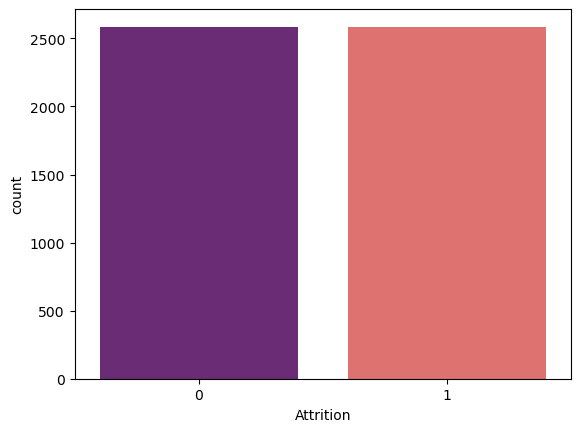

In [69]:
smote_df = x_smote.copy()
smote_df['Attrition'] = y_smote
sns.countplot(x='Attrition', data = smote_df, palette='magma')

In [70]:
smote_df['Attrition'].value_counts(normalize=True)*100

Attrition
0    50.0
1    50.0
Name: proportion, dtype: float64

In [71]:
x_smote.shape, y_smote.shape

((5172, 44), (5172,))

**Note:-**
* **Now data is balanced.**

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, x_test, y_train, y_test, hyperparameters={}):
    model.set_params(**hyperparameters)
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate evaluation metrics for training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_score = roc_auc_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_score = roc_auc_score(y_test, y_test_pred)

    # Create a dictionary to store the results
    evaluation_results = {
        'Train Accuracy'           : train_accuracy,
        'Train Precision'          : train_precision,
        'Train Recall'             : train_recall,
        'Train F1 Score'           : train_f1,
        'Train ROC AUC Score'      : train_roc_score,
        'Test Accuracy'            : test_accuracy,
        'Test Precision'           : test_precision,
        'Test Recall'              : test_recall,
        'Test F1 Score'            : test_f1,
        'Test ROC AUC Score'       : test_roc_score,
        'y_train_pred'             : y_train_pred,
        'y_test_pred'              : y_test_pred,
        'trained_model'            : model}

    return evaluation_results

In [73]:
def plot_confusion_matrix(y_true, y_pred, labels = ['1', '0']):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

* **INFO:-**

* (0, 0): FP (False Positives) - predicted 0 when the actual label was 0.
* (0, 1): TN (True Negatives) - predicted 1 when the actual label was 0.
* (1, 0): FN (False Negatives) - predicted 0 when the actual label was 1.
* (1, 1): TP (True Positives) - predicted 1 when the actual label was 1.

### Logistics regression

In [74]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
model_logistic = evaluate_model(logistic_model,x_smote, x_test, y_smote, y_test)
model_logistic

{'Train Accuracy': 0.7380123743232792,
 'Train Precision': 0.7609156422212802,
 'Train Recall': 0.694122196442382,
 'Train F1 Score': 0.7259858442871587,
 'Train ROC AUC Score': 0.7380123743232793,
 'Test Accuracy': 0.7154195011337868,
 'Test Precision': 0.25877192982456143,
 'Test Recall': 0.41843971631205673,
 'Test F1 Score': 0.31978319783197834,
 'Test ROC AUC Score': 0.5951847704367301,
 'y_train_pred': array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 'y_test_pred': array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0,

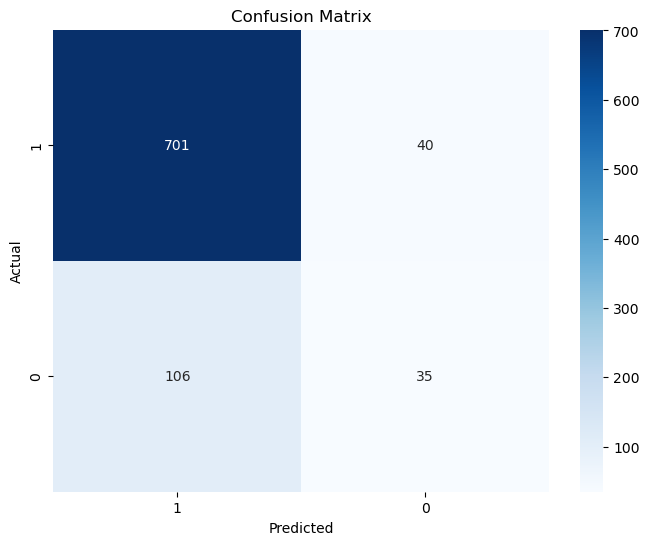

In [87]:
plot_confusion_matrix(y_test, model_logistic['y_test_pred'])

**Observation:-**
* **TP (True Positives) is 701, and FP (False Positives) is 35, FN (False Negatives) is 40, TN (True Negatives) is 106.**

### Random forest classification

In [88]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_random = evaluate_model(Random_forest, x_smote, x_test, y_smote, y_test)
model_random

{'Train Accuracy': 1.0,
 'Train Precision': 1.0,
 'Train Recall': 1.0,
 'Train F1 Score': 1.0,
 'Train ROC AUC Score': 1.0,
 'Test Accuracy': 0.9897959183673469,
 'Test Precision': 0.9852941176470589,
 'Test Recall': 0.950354609929078,
 'Test F1 Score': 0.9675090252707581,
 'Test ROC AUC Score': 0.9738277772992219,
 'y_train_pred': array([0, 0, 1, ..., 1, 1, 1], dtype=int64),
 'y_test_pred': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 

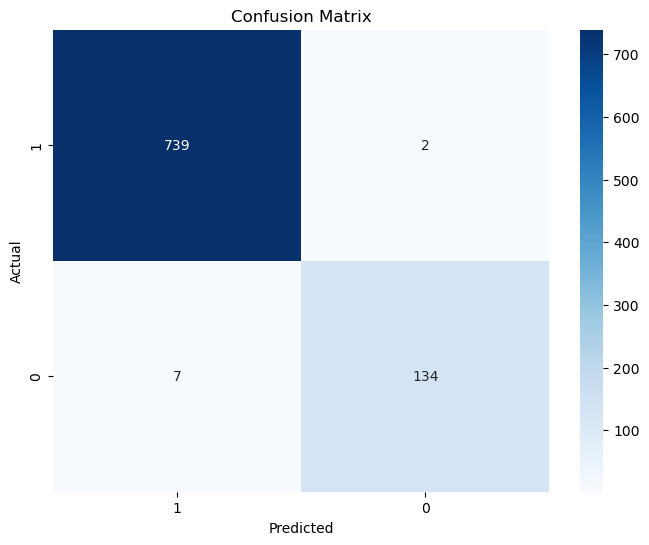

In [89]:
plot_confusion_matrix(y_test, model_random ['y_test_pred'])

**Observation:-**
* **TP (True Positives) is 739, and FP (False Positives) is 134, FN (False Negatives) is 2, TN (True Negatives) is 7.**

### Hyper tuning parameter for logistics regression

In [90]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [91]:
#Applying GridSeachCV method
param_grid = {'penalty':['l1','l2','elasticnet', None], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' :['lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4, cv = 5)
grid_lr_clf.fit(x_smote, y_smote)
optimized_clf = grid_lr_clf.best_estimator_
optimized_params = grid_lr_clf.best_params_

Fitting 5 folds for each of 112 candidates, totalling 560 fits


In [92]:
#Applying Hyperparameter tuning  on Logistic Regression
logistic_model = LogisticRegression()
hp = optimized_params
model_logistic = evaluate_model(model=logistic_model, x_train=x_smote, x_test=x_test, y_train=y_smote, y_test=y_test, hyperparameters=hp)
model_logistic

{'Train Accuracy': 0.8965583913379737,
 'Train Precision': 0.9580169718624386,
 'Train Recall': 0.8294663573085846,
 'Train F1 Score': 0.8891191709844559,
 'Train ROC AUC Score': 0.8965583913379735,
 'Test Accuracy': 0.8356009070294784,
 'Test Precision': 0.47368421052631576,
 'Test Recall': 0.2553191489361702,
 'Test F1 Score': 0.3317972350230415,
 'Test ROC AUC Score': 0.6006690211617424,
 'y_train_pred': array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 'y_test_pred': array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 

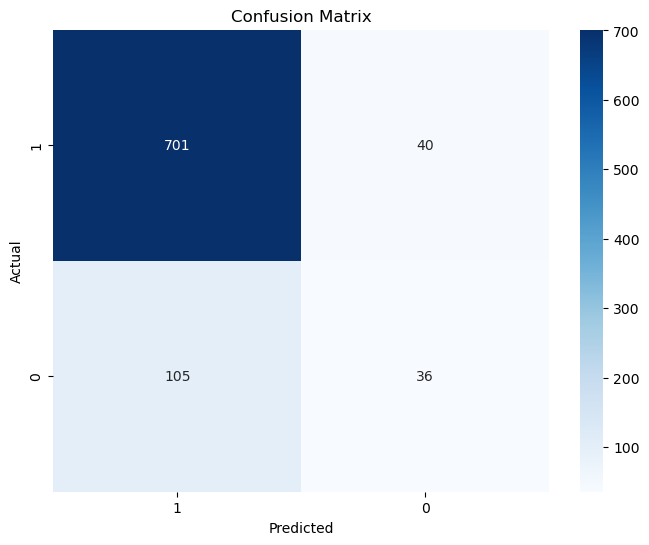

In [93]:
plot_confusion_matrix(y_test, model_logistic['y_test_pred'])

**Observation:-**
* **TP (True Positives) is 701, and FP (False Positives) is 36, FN (False Negatives) is 40, TN (True Negatives) is 105.**

### Hyper tuning parameters for Random Forest Classification

In [94]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(10, 200),'max_depth': randint(1, 20),'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20), 'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False],'criterion': ['gini', 'entropy']}

model_random  = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(model_random , param_distributions=param_dist, n_iter=10,  scoring='accuracy',
    cv=5, verbose=1, n_jobs=-1)

random_search.fit(x_smote, y_smote)

RF_best_params = random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [95]:
RF_best_params = {'min_samples_split':9,'criterion': 'entropy','max_depth': 19,'max_features': 'sqrt','min_samples_leaf': 1,'n_jobs':-1}


In [96]:
random_forest_model = RandomForestClassifier(random_state=42)
hyper_parameter = RF_best_params
model_random  = evaluate_model(model=random_forest_model, x_train=x_smote, x_test=x_test, y_train=y_smote, y_test=y_test, hyperparameters=hyper_parameter)
model_random 

{'Train Accuracy': 0.998646558391338,
 'Train Precision': 1.0,
 'Train Recall': 0.997293116782676,
 'Train F1 Score': 0.9986447241045499,
 'Train ROC AUC Score': 0.998646558391338,
 'Test Accuracy': 0.9682539682539683,
 'Test Precision': 0.9669421487603306,
 'Test Recall': 0.8297872340425532,
 'Test F1 Score': 0.8931297709923665,
 'Test ROC AUC Score': 0.9121945616906423,
 'y_train_pred': array([0, 0, 1, ..., 1, 1, 1], dtype=int64),
 'y_test_pred': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

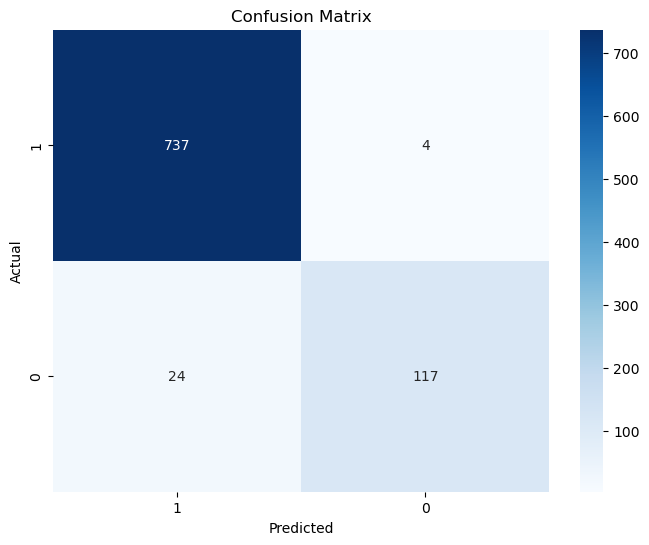

In [97]:
plot_confusion_matrix(y_test, model_random ['y_test_pred'])

**Observation:-**
* **TP (True Positives) is 737, and FP (False Positives) is 117, FN (False Negatives) is 4, TN (True Negatives) is 24.**

### Roc Curve

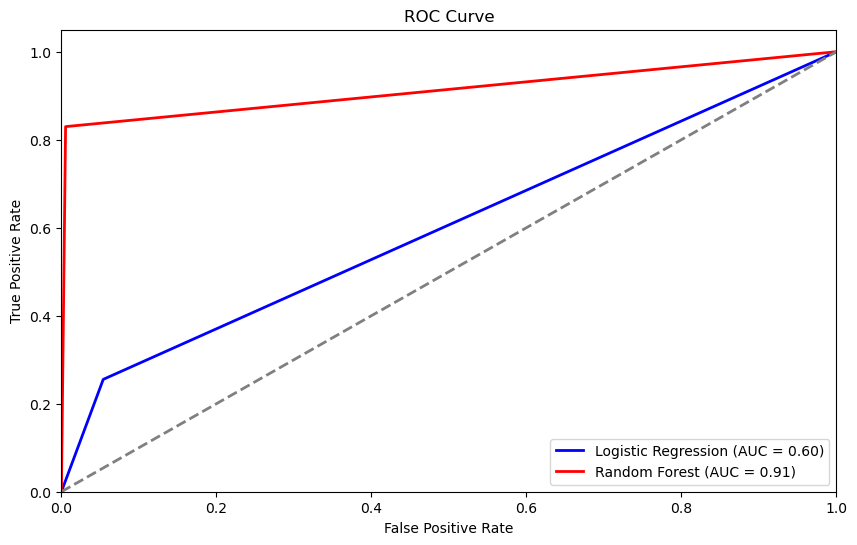

In [99]:
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, _ = roc_curve(y_test, model_logistic['y_test_pred'])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, model_random['y_test_pred'])
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(10, 6))

plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='r', lw=2, label=f'Random Forest (AUC = {roc_auc2:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Summary

* **The random forest model is performing really well with an AUC of 0.91, meaning it’s quite good at predicting which employees might leave. It’s a strong choice if you want accurate predictions about attrition.**

* **On the other hand, the logistic regression model has a lower AUC of 0.60. This means it’s not as effective at predicting who might leave, so it might not be as reliable for this purpose.**

**Note:-**
* **We can go for random forest model for better accuracy.**